### Course: Python Machine Learning Labs
### Project: Develop an End-to-End Machine Learning Pipeline 
### Instructor: Assan Sanogo
### Professor: Hanna Abi Akl

__________________________________________________________________________________

## Environment Set-Up 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import spacy
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import sent_tokenize
from nltk.tokenize import PunktSentenceTokenizer
from nltk import RegexpParser
from nltk import Tree
nltk.download('averaged_perceptron_tagger')

import math
from math import sqrt

from functools import reduce
from textblob import TextBlob
import language_tool_python
import textstat
from textstat import flesch_reading_ease
from textstat import dale_chall_readability_score


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

from spellchecker import SpellChecker
import re
from collections import Counter

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yaako\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


________________________________________________________________________________

## Data Extraction

In [3]:
# Specify the path to your Excel file
file_path = r"C:\Users\yaako\OneDrive\Bureau\M1 Data Science\Projet machine learning/training_set_rel3.xlsx"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

________________________________________________________________

## Data Exploration

In [4]:
np.shape(df)

(12978, 28)

In [5]:
score_columns = [ 'domain1_score','domain2_score']

In [6]:
# Remplacer NaN par la moyenne de chaque colonne de score
for col in score_columns:
    df[col].fillna(df[col].mean(), inplace=True)


In [7]:
df[score_columns]

,domain1_score,domain2_score
0,8.0,3.333889
1,9.0,3.333889
2,7.0,3.333889
3,10.0,3.333889
4,8.0,3.333889
...,...,...
12973,35.0,3.333889
12974,32.0,3.333889
12975,40.0,3.333889
12976,40.0,3.333889


In [8]:
# data set is quit big, so we check the columns what we have
df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

# Normalization of Our Scores for Dataframe

In [230]:
from sklearn.preprocessing import MinMaxScaler

# Définir les colonnes de score que vous voulez normaliser
score_columns = [
    'domain1_score', 'domain2_score'
]

# Initialiser le MinMaxScaler
scaler = MinMaxScaler()

# Supposons que 'df' est votre DataFrame
# Traiter les NaN avant la normalisation
df[score_columns] = df[score_columns].fillna(df[score_columns].mean())

# Ajuster et transformer les données
df[score_columns] = scaler.fit_transform(df[score_columns])

# Maintenant, df[score_columns] contient vos scores normalisés


In [231]:
df[score_columns]

,domain1_score,domain2_score
0,0.133333,0.777963
1,0.150000,0.777963
2,0.116667,0.777963
3,0.166667,0.777963
4,0.133333,0.777963
...,...,...
12973,0.583333,0.777963
12974,0.533333,0.777963
12975,0.666667,0.777963
12976,0.666667,0.777963


In [21]:
# Filtering data for Essay Set #7
#df = df[(df['essay_set'] == 7)]

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
# we look at the size of our DataSet
np.shape(df)

(12978, 28)

In [9]:
# Check for NaN values in each column
nan_columns_2 = df.columns[df.isnull().any()]

# Display columns with NaN values
print("Columns with NaN values:")
print(nan_columns_2)

# Display columns without NaN values
print("\nColumns without NaN values:")
print(df.columns[df.notnull().all()])

Columns with NaN values:
Index(['rater1_domain1', 'rater2_domain1', 'rater3_domain1', 'rater1_domain2',
       'rater2_domain2', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

Columns without NaN values:
Index(['essay_id', 'essay_set', 'essay', 'domain1_score', 'domain2_score'], dtype='object')


In [10]:
df_clean  = df.dropna(axis=1)

In [11]:
# Checking the cleaned data set 7
df_clean

,essay_id,essay_set,essay,domain1_score,domain2_score
0,1,1,"Dear local newspaper, I think effects computer...",8.0,3.333889
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3.333889
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,3.333889
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,3.333889
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,3.333889
...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35.0,3.333889
12974,21628,8,I never understood the meaning laughter is th...,32.0,3.333889
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40.0,3.333889
12976,21630,8,Trippin' on fen...,40.0,3.333889


In [12]:
for index, row in df_clean.iloc[:2].iterrows():
    essay = row['essay']
    print('Essay example:')
    print(essay)

Essay example:
Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question ab

In [13]:
# Calculation of essays length
df_clean['essay_length'] = df_clean['essay'].str.split().str.len()

C:\Users\yaako\AppData\Local\Temp\ipykernel_2584\2571951346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['essay_length'] = df_clean['essay'].str.split().str.len()


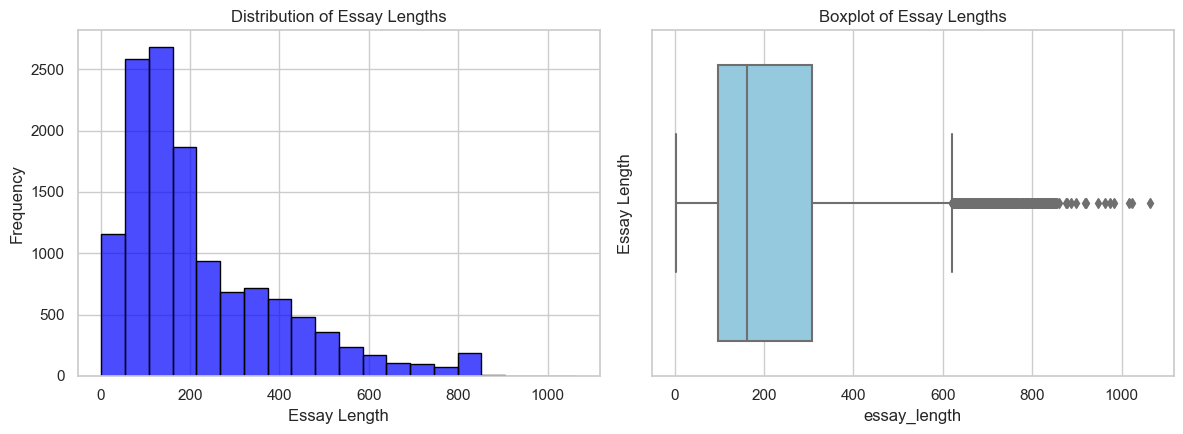

In [14]:
essay_lengths = df_clean['essay_length']

# Set the style for Seaborn
sns.set(style="whitegrid")

# Preparing the plotting layout
fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot histogram on the first subplot using Seaborn
sns.histplot(essay_lengths, bins=20, color='blue', edgecolor='black', alpha=0.7, ax=axs[0])
axs[0].set_title('Distribution of Essay Lengths')
axs[0].set_xlabel('Essay Length')
axs[0].set_ylabel('Frequency')

# Plot boxplot on the second subplot using Seaborn
sns.boxplot(x=essay_lengths, ax=axs[1], color='skyblue')
axs[1].set_title('Boxplot of Essay Lengths')
axs[1].set_ylabel('Essay Length')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
def extract_special_words_from_column(essay_column):
    """
    This function extracts special words prefixed with "@" from each essay (tagged words).
    Input: essays.
    Output: A list of special words prefixed with "@" found in the essays.
    """

    return essay_column.apply(lambda essay: [word for word in essay.split() if word.startswith('@')]).sum()

# Example usage
special_words = extract_special_words_from_column(df_clean['essay'])

In [16]:
def group_words_by_category(special_words):
    """"
    This function takes a list of special words prefixed with "@" as input.
    It extracts unique categories from the special words based on a predefined pattern (format: "@" followed by Capitalized (uppercase) category and an optional numeric part).
    The output is a list of unique categories found in the special words.
    """

    # Define the regular expression pattern
    pattern = re.compile(r'@([A-Z]+)([0-9]*)')

    # Use a set to store unique categories
    unique_categories = {match.group(1) for word in special_words if (match := pattern.match(word))}

    return list(unique_categories)


In [17]:
# Extract the tags from all essays
special_words = extract_special_words_from_column(df_clean['essay'])
# Group the tags that belong to the same category
categories = group_words_by_category(special_words)
print(special_words)

['@ORGANIZATION1,', '@ORGANIZATION2,', '@CAPS1,', "@DATE1's", '@CAPS2', '@CAPS1', '@CAPS2,', '@NUM1', '@MONTH1', '@LOCATION1.', '@LOCATION3.', '@LOCATION2.', '@NUM1', '@NUM3', '@NUM3', '@CAPS1', '@CAPS2', '@CAPS3', '@CAPS4,', '@MONTH1', '@CAPS5', '@ORGANIZATION1', '@CAPS1', '@PERCENT1', '@CAPS2', '@PERSON1', '@PERSON2', '@CAPS2', '@CAPS3', '@CAPS4', '@CAPS2', '@CAPS3', '@LOCATION2', '@PERCENT2', '@PERCENT3', '@PERCENT4', '@LOCATION1', '@PERCENT5', '@PERCENT2', '@CAPS2', '@CAPS3', '@CAPS5', '@CAPS6', '@CAPS7', '@CAPS2', '@NUM1', '@ORGANIZATION1', '@PERCENT1', '@ORGANIZATION1', '@PERCENT5', '@CAPS8', '@NUM2', '@CAPS3', '@CAPS3', '@ORGANIZATION1', '@PERSON3,', "@ORGANIZATION2's", '@CAPS2', '@CAPS3', '@NUM3', '@LOCATION3.', '@LOCATION1,', '@NUM1', '@LOCATION2', '@CAPS1', '@LOCATION1,', '@NUM1', '@NUM2.', '@NUM3', '@CAPS1', '@CAPS2', '@NUM4', '@CAPS2', '@CAPS3', '@MONTH1', '@CAPS1', '@PERCENT1', '@NUM1', '@CAPS1', '@NUM1', '@CAPS1', '@CAPS1', '@PERCENT1', '@ORGANIZATION1', '@NUM1', '@NUM2',

In [18]:
print(categories)

['MONEY', 'PERCENT', 'CITY', 'STATE', 'TIME', 'DATE', 'DR', 'LOCATION', 'MONTH', 'ORGANIZATION', 'CAPS', 'EMAIL', 'NUM', 'PERSON']


In [19]:
df_clean.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_score', 'domain2_score',
       'essay_length'],
      dtype='object')

In [35]:
def count_words_by_category(essay, special_words):
    """
    This function takes an essay (text) and a list of special words prefixed with "@" as input.
    It counts the occurrences of words for each category found in the essay based on the provided special words.
    The output is a dictionary containing the count of words for each category extracted from the essay.
    """

    # Define the regular expression pattern
    pattern = re.compile(r'@([A-Z]+)([0-9]*)')

    # Use Counter to count occurrences directly
    word_counts = Counter(match.group(1) for match in re.finditer(pattern, essay) if match.group(1) in special_words)

    return dict(word_counts)

def process_essays(df, special_words):
    """
    This function processes essays stored in a DataFrame by extracting and categorizing special words.
    It adds a new column ('tag_counts') to the DataFrame, containing dictionaries of word counts for each category extracted from the essays.
    The output is the modified DataFrame with additional information about word counts for each category in the essays.
    """

    # Use apply and lambda to create the 'tag_counts' column
    df['tag_counts'] = df['essay'].apply(lambda x: count_words_by_category(x, special_words))

    return df

In [36]:
# Adding the categories to the data set
df_clean = process_essays(df_clean, categories)

In [37]:
df_clean['tag_counts']

0                {'ORGANIZATION': 2, 'CAPS': 2, 'DATE': 1}
1         {'CAPS': 2, 'NUM': 4, 'MONTH': 1, 'LOCATION': 3}
2               {'CAPS': 5, 'MONTH': 1, 'ORGANIZATION': 1}
3        {'CAPS': 20, 'PERCENT': 8, 'PERSON': 3, 'LOCAT...
4                     {'LOCATION': 2, 'NUM': 1, 'CAPS': 1}
                               ...                        
12973             {'CAPS': 45, 'LOCATION': 6, 'PERSON': 4}
12974     {'PERSON': 10, 'NUM': 3, 'CAPS': 18, 'MONTH': 1}
12975    {'CAPS': 27, 'DATE': 1, 'PERSON': 25, 'LOCATIO...
12976    {'NUM': 3, 'ORGANIZATION': 10, 'LOCATION': 2, ...
12977                       {'ORGANIZATION': 4, 'CAPS': 7}
Name: tag_counts, Length: 12978, dtype: object

In [38]:
df_clean.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_score', 'domain2_score',
       'essay_length', 'tags_percentage', 'sent/leng ratio', 'tag_counts'],
      dtype='object')

In [39]:
df_clean['total_tags'] = df_clean['tag_counts'].apply(lambda x: sum(value for value in x.values()))

In [40]:
df_clean = df_clean.assign(tags_percentage=lambda x: (x['total_tags'] / x['essay_length']) * 100)

In [41]:
df_clean['tags_percentage']

0        1.479290
1        2.386635
2        2.508961
3        7.824427
4        0.860215
           ...   
12973    6.508876
12974    5.860806
12975    6.976744
12976    3.558719
12977    2.355460
Name: tags_percentage, Length: 12978, dtype: float64

In [42]:
# Round up the values in the 'tags_percentage' column
df_clean.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_score', 'domain2_score',
       'essay_length', 'tags_percentage', 'sent/leng ratio', 'tag_counts',
       'total_tags'],
      dtype='object')

In [43]:
df_clean.head(3)

,essay_id,essay_set,essay,domain1_score,domain2_score,essay_length,tags_percentage,sent/leng ratio,tag_counts,total_tags
0,1,1,"Dear local newspaper, I think effects computer...",8.0,3.333889,338,1.479290,11.0,"{'ORGANIZATION': 2, 'CAPS': 2, 'DATE': 1}",5
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3.333889,419,2.386635,19.0,"{'CAPS': 2, 'NUM': 4, 'MONTH': 1, 'LOCATION': 3}",10
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,3.333889,279,2.508961,15.0,"{'CAPS': 5, 'MONTH': 1, 'ORGANIZATION': 1}",7


In [44]:
# Adding a new boolean column, 'contains_tag', to the DataFrame df7_clean
df_clean = df_clean.assign(contains_tag=df_clean['essay'].str.contains('@').astype(int))

# Check the results
print(df_clean)

       essay_id  essay_set                                              essay  \
0             1          1  Dear local newspaper, I think effects computer...   
1             2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4             5          1  Dear @LOCATION1, I know having computers has a...   
...         ...        ...                                                ...   
12973     21626          8   In most stories mothers and daughters are eit...   
12974     21628          8   I never understood the meaning laughter is th...   
12975     21629          8  When you laugh, is @CAPS5 out of habit, or is ...   
12976     21630          8                                 Trippin' on fen...   
12977     21633          8   Many people believe that laughter can improve...   

       domain1_score  domai

C:\Users\yaako\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


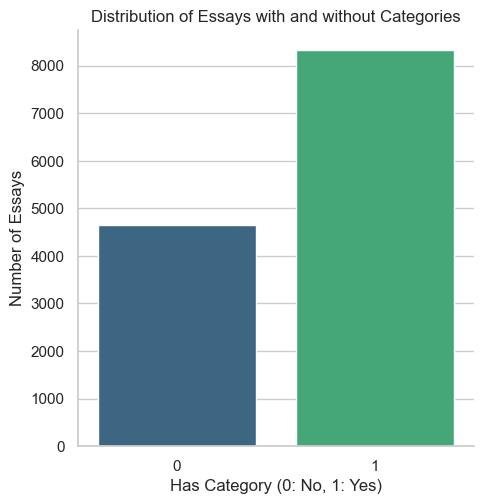

In [45]:
sns.catplot(x='contains_tag', kind='count', data=df_clean, palette='viridis')
plt.title('Distribution of Essays with and without Categories')
plt.xlabel('Has Category (0: No, 1: Yes)')
plt.ylabel('Number of Essays')
plt.show()

In [46]:
df_clean.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_score', 'domain2_score',
       'essay_length', 'tags_percentage', 'sent/leng ratio', 'tag_counts',
       'total_tags', 'contains_tag'],
      dtype='object')

In [47]:
df_clean.drop(columns=['tag_counts', 'total_tags', 'contains_tag'], inplace=True)
df_clean.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_score', 'domain2_score',
       'essay_length', 'tags_percentage', 'sent/leng ratio'],
      dtype='object')

In [48]:
def calculate_sentences_to_paragraphs_ratio(essay):
    """
    This function calculates the ratio of sentences to paragraphs in an essay.
    Input: essay (string): The text of the essay.
    Output: Ratio of sentences to paragraphs.
    Process: It splits the essay into paragraphs based on double line breaks ('\n\n'),
    then splits each paragraph into sentences based on periods ('.').
    Finally, it calculates the ratio of the total number of sentences to the total number of paragraphs.
    """

    # Split the essay into paragraphs and sentences
    paragraphs = [paragraph for paragraph in essay.split('\n') if paragraph.strip()]
    sentences = [sentence.strip() for paragraph in paragraphs for sentence in paragraph.split('.')]

    # Avoid division by zero
    if not paragraphs:
        return 0

    # Calculate the ratio
    ratio = len(sentences) / len(paragraphs)

    return ratio

In [49]:
df_clean['sent/leng ratio'] = df_clean['essay'].apply(calculate_sentences_to_paragraphs_ratio)

In [50]:
# Load the NLP spaCy English model
nlp = spacy.load("en_core_web_sm")

In [51]:
def analyze_nlp(essay):
    """
    This function analyzes an essay using the spaCy English model.
    Input: essay.
    Output: spaCy doc object representing the analyzed essay.
    Procedure: It loads the spaCy English model and processes the input essay, returning the resulting doc object.
    """

    doc = nlp(essay)
    return doc

In [52]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])  # Load spaCy model with certain components disabled

def analyze_nlp(essays):
    """
    Analyzes a list of essays using the spaCy English model.
    Input: List of essays.
    Output: List of spaCy doc objects representing the analyzed essays.
    """
    docs = list(nlp.pipe(essays))
    return docs

# Assuming df_clean is your DataFrame and it has a column 'essay' for essay texts
essays = df_clean['essay'].tolist()  # Convert essays to a list
docs = analyze_nlp(essays)  # Process essays in batches

# If you need to store the processed docs back into the DataFrame, you can do so as follows:
# Note: Storing spaCy Doc objects directly in a DataFrame can be memory-intensive.
# You might want to extract and store only the necessary information from these docs.
df_clean['nlp_spacy'] = docs


In [53]:
print(df_clean['nlp_spacy'] )

0        (Dear, local, newspaper, ,, I, think, effects,...
1        (Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...
2        (Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...
3        (Dear, Local, Newspaper, ,, @CAPS1, I, have, f...
4        (Dear, @LOCATION1, ,, I, know, having, compute...
                               ...                        
12973    ( , In, most, stories, mothers, and, daughters...
12974    ( , I, never, understood, the, meaning, laught...
12975    (When, you, laugh, ,, is, @CAPS5, out, of, hab...
12976    (                               , Trippin, ', ...
12977    ( , Many, people, believe, that, laughter, can...
Name: nlp_spacy, Length: 12978, dtype: object


In [54]:
df_clean.head(3)

,essay_id,essay_set,essay,domain1_score,domain2_score,essay_length,tags_percentage,sent/leng ratio,nlp_spacy
0,1,1,"Dear local newspaper, I think effects computer...",8.0,3.333889,338,1.479290,11.0,"(Dear, local, newspaper, ,, I, think, effects,..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3.333889,419,2.386635,19.0,"(Dear, @CAPS1, @CAPS2, ,, I, believe, that, us..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,3.333889,279,2.508961,15.0,"(Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m..."


In [55]:
def calculate_sentence_length_variation(essay):
    """
    This function computes the variance of sentence lengths in an essay.
    Input: essay (spaCy doc object): The processed essay.
    Output: Variance of sentence lengths.
    Procedure: It processes the essay with spaCy, extracts the lengths of individual sentences, calculates the mean sentence length, and then determines the variance of sentence lengths based on the mean. If there is only one sentence, it sets the variance to 0.
    """

    # Process the essay with spaCy
    doc = essay

    # Extract the lengths of individual sentences
    sentence_lengths = [len(sent) for sent in doc.sents]

    # Calculate the variance
    if len(sentence_lengths) <= 1:
        return 0.0

    mean_length = sum(sentence_lengths) / len(sentence_lengths)
    variance = sum((length - mean_length) ** 2 for length in sentence_lengths) / len(sentence_lengths)

    return variance

In [56]:
import spacy
from pandas import DataFrame

# Load spaCy model and ensure it has sentence segmentation capability
nlp = spacy.load("en_core_web_sm")
if 'sentencizer' not in nlp.pipe_names:
    nlp.add_pipe('sentencizer')

# Example function that now also processes the text with spaCy
def calculate_sentence_stats(text):
    doc = nlp(text)  # Assuming 'text' is raw text that needs processing
    sentence_lengths = [len(sent.text.split()) for sent in doc.sents]
    
    if len(sentence_lengths) <= 1:
        return (0.0, 0.0)  # mean, variance
    
    mean_length = sum(sentence_lengths) / len(sentence_lengths)
    variance = sum((length - mean_length) ** 2 for length in sentence_lengths) / len(sentence_lengths)
    
    return (mean_length, variance)

# Assuming df_clean['essay'] contains the raw text of essays
# Apply the function and create two new columns
df_clean[['mean_sentence_length', 'sentence_length_variance']] = df_clean['essay'].apply(
    lambda essay: pd.Series(calculate_sentence_stats(essay))
)



In [57]:
df_clean.head(3)

,essay_id,essay_set,essay,domain1_score,domain2_score,essay_length,tags_percentage,sent/leng ratio,nlp_spacy,mean_sentence_length,sentence_length_variance
0,1,1,"Dear local newspaper, I think effects computer...",8.0,3.333889,338,1.479290,11.0,"(Dear, local, newspaper, ,, I, think, effects,...",21.125,171.984375
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3.333889,419,2.386635,19.0,"(Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",20.950,142.247500
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,3.333889,279,2.508961,15.0,"(Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",18.600,153.306667


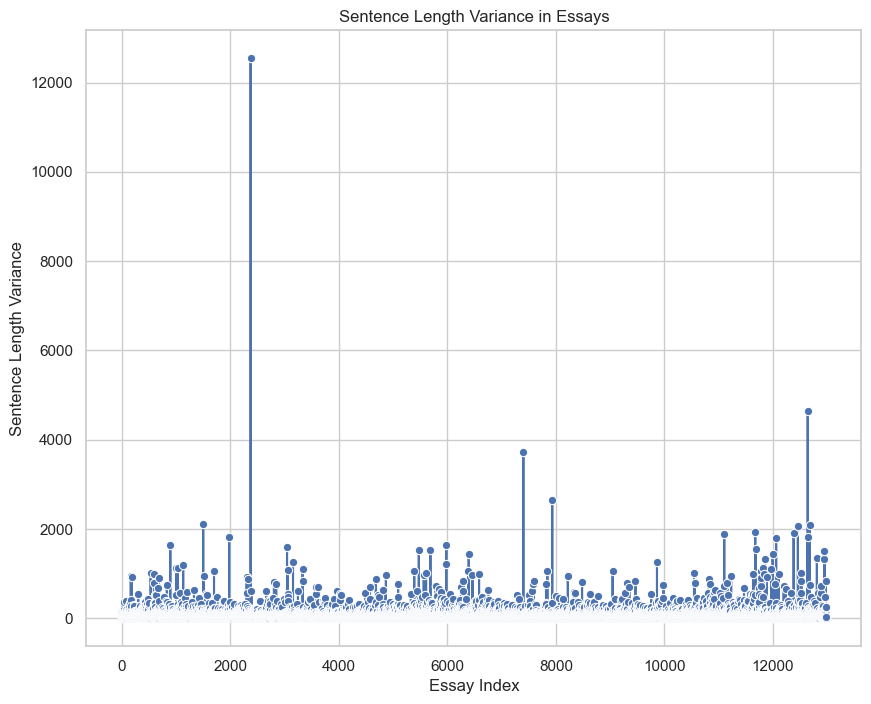

In [58]:
# Set the style to a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plot the variation in sentence length variance using Seaborn
plt.figure(figsize=(10, 8))  # Adjusted figure size for better readability
sns.lineplot(data=df_clean, x=df_clean.index, y='sentence_length_variance', marker='o', color='b')
plt.title('Sentence Length Variance in Essays')
plt.xlabel('Essay Index')
plt.ylabel('Sentence Length Variance')
plt.show()


In [59]:
def count_transition_words(essay):
    """
    This function counts the occurrences of common transition words in an essay.
    Input: essay (spaCy doc object): The processed essay.
    Output: Count of transition words.
    Procedure: It processes the essay with spaCy and counts the occurrences of predefined transition words.
    """

    # Process the essay with spaCy
    doc = essay
    
    # Define a set of common transition words for faster lookup
    transition_words = {
        'additionally', 'furthermore', 'moreover', 'in addition', 'also', 'and', 'as well as',
        'however', 'nevertheless', 'nonetheless', 'on the other hand', 'but', 'yet', 'still', 'conversely', 'in contrast',
        'similarly', 'likewise', 'in the same way', 'compared to', 'just as', 'akin to', 'similarly to',
        'therefore', 'thus', 'consequently', 'as a result', 'because', 'since', 'due to', 'owing to', 'hence',
        'meanwhile', 'afterward', 'subsequently', 'next', 'then', 'finally', 'in the meantime', 'during', 'before', 'after', 'now',
        'in conclusion', 'to sum up', 'overall', 'in summary', 'to conclude', 'consequently',
        'for example', 'for instance', 'to illustrate', 'specifically', 'such as',
        'indeed', 'certainly', 'in fact', 'of course', 'undoubtedly', 'unquestionably',
        'in addition to', 'moreover', 'furthermore', 'on the other hand', 'as a result', 'in conclusion', 'to sum up', 'for instance', 'in fact', 'for example',
        'first', 'second', 'third', 'finally', 'next', 'then', 'before', 'after', 'meanwhile'
    }   

    # Count the occurrences of transition words
    count = sum(1 for token in doc if token.text.lower() in transition_words)
    
    return count


In [60]:
df_clean['nlp_spacy'].apply(count_transition_words)

0        13
1        21
2        17
3        17
4        19
         ..
12973    63
12974    32
12975    42
12976    29
12977    13
Name: nlp_spacy, Length: 12978, dtype: int64

In [61]:
df_clean['transition_words_counts']= df_clean['nlp_spacy'].apply(count_transition_words)

_______________________________________________________

In [62]:
def count_sentences(essay):
    """
    Counts the number of sentences in the provided essay.
    Input: Essay 
    Output: Total number of sentences
    """

    # Define endpoint punctuation marks
    endpoint_punctuation = ['.', '!', '?']

    # Initialize count
    num_sentences = 0

    # Iterate through each character in the essay
    for char in essay:
        # If the character is an endpoint punctuation mark
        if char in endpoint_punctuation:
            # Increment the sentence count
            num_sentences += 1

    # Return the total number of sentences
    return num_sentences

In [63]:
# Assuming 'count_sentences' is a function that counts sentences in an essay

# Calculate the number of sentences and add it as a new column
df_clean['num_sentences'] = df_clean['essay'].apply(count_sentences)

# Display the DataFrame with the new column
print("DataFrame with Number of Sentences:")
print(df_clean[['essay', 'num_sentences']])

DataFrame with Number of Sentences:
                                                   essay  num_sentences
0      Dear local newspaper, I think effects computer...             16
1      Dear @CAPS1 @CAPS2, I believe that using compu...             20
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...             14
3      Dear Local Newspaper, @CAPS1 I have found that...             27
4      Dear @LOCATION1, I know having computers has a...             30
...                                                  ...            ...
12973   In most stories mothers and daughters are eit...             27
12974   I never understood the meaning laughter is th...             43
12975  When you laugh, is @CAPS5 out of habit, or is ...             53
12976                                 Trippin' on fen...             42
12977   Many people believe that laughter can improve...             29

[12978 rows x 2 columns]


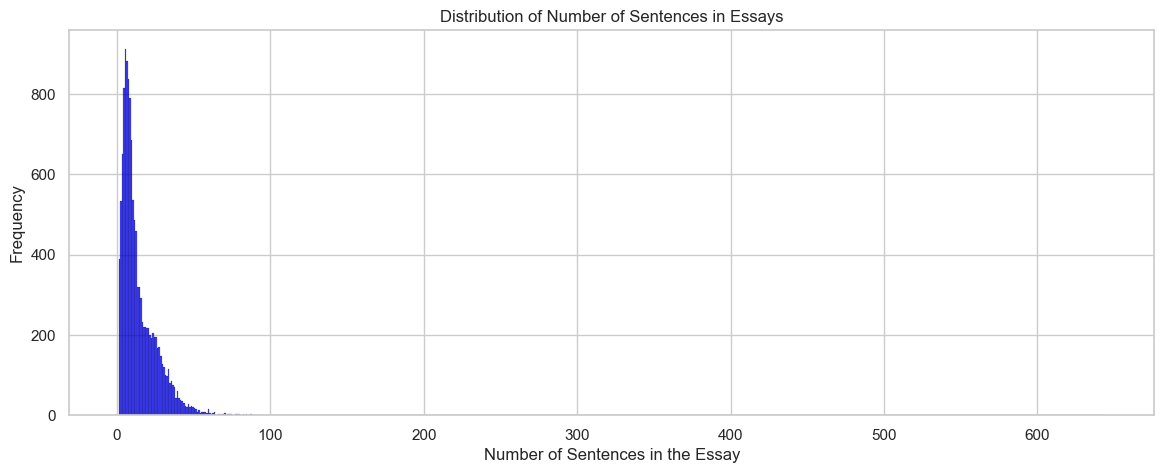

In [64]:
# Set the style to a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a histogram with a specified bin width
plt.figure(figsize=(14, 5))
sns.histplot(df_clean['num_sentences'], bins=np.arange(1, np.max(df_clean['num_sentences']) + 1.5, 1), color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Sentences in the Essay')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Sentences in Essays')

# Show the plot
plt.show()

In [65]:
# Filter essays with only 1 sentence
one_sentence_essays = df_clean[df_clean['num_sentences'] == 1]

# Print the number of essays with only 1 sentence
num_one_sentence_essays = len(one_sentence_essays)
print(f"Number of essays with only 1 sentence: {num_one_sentence_essays}")

# Print the content of those essays
for index, row in one_sentence_essays.iterrows():
    print(f"Essay {index + 1}:\n{row['essay']}\n")

Number of essays with only 1 sentence: 390
Essay 357:
Being active has no limit, but technology does.

Essay 447:
Computers are good because people can find what they need and their fun ask things find places get things for a good price.

Essay 830:
Dear editor, computers are good for people because it really helps with they work and home work and other stuff.

Essay 1249:
Dear @CAPS1 @CAPS2, I think that computers are bad because you will be wonign to do no homework because people are playing to much computers and they are getting aditivf to the computers and it is dayise because you mit be talking to people that you don't now on thr computer and it is the vary dagis because it is the sam thing as haveing a myspace on teh computer it is vaery dangish because ther are dad people that be going on the computer and people be pating bad stuf on the computer.

Essay 1872:
I do think that there should be a censorship in not just in libaries, but everywhare.       Personlly, I think that the 

Number of essays with only 1 sentence: 390
Essay 357:
Being active has no limit, but technology does.

Essay 447:
Computers are good because people can find what they need and their fun ask things find places get things for a good price.

Essay 830:
Dear editor, computers are good for people because it really helps with they work and home work and other stuff.

Essay 1249:
Dear @CAPS1 @CAPS2, I think that computers are bad because you will be wonign to do no homework because people are playing to much computers and they are getting aditivf to the computers and it is dayise because you mit be talking to people that you don't now on thr computer and it is the vary dagis because it is the sam thing as haveing a myspace on teh computer it is vaery dangish because ther are dad people that be going on the computer and people be pating bad stuf on the computer.

Essay 1872:
I do think that there should be a censorship in not just in libaries, but everywhare.       Personlly, I think that the 

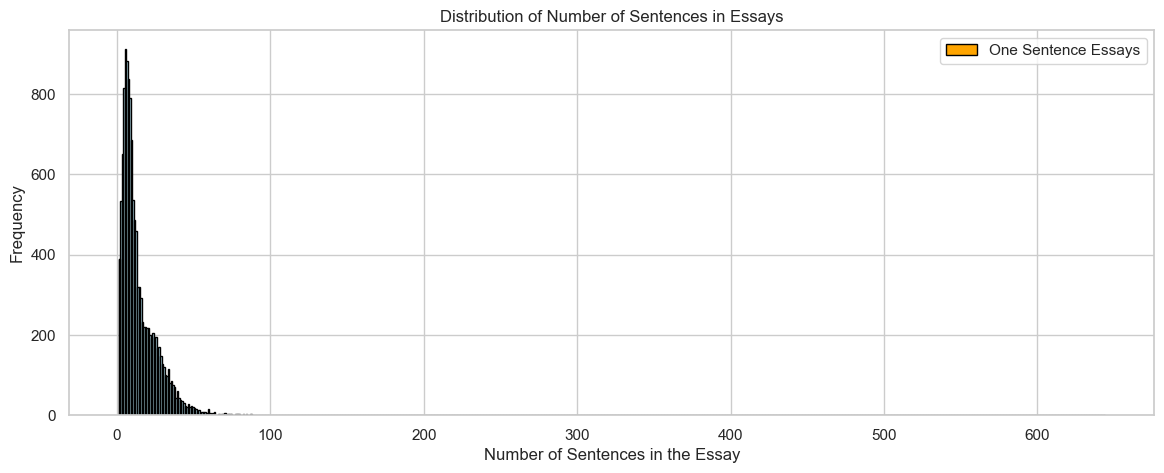

In [66]:
one_sentence_essays = df_clean[df_clean['num_sentences'] == 1]

# Print the number of essays with only 1 sentence
print(f"Number of essays with only 1 sentence: {len(one_sentence_essays)}")

# Print the content of those essays
for index, row in one_sentence_essays.iterrows():
    print(f"Essay {index + 1}:\n{row['essay']}\n")

# Create a histogram with different colors
plt.figure(figsize=(14, 5))
plt.hist(df_clean['num_sentences'], bins=np.arange(1, np.max(df_clean['num_sentences']) + 1.5, 1), color='lightblue', edgecolor='black')

# Highlight one-sentence essays in a different color
plt.hist(one_sentence_essays['num_sentences'], bins=np.arange(1, 2.5, 1), color='orange', edgecolor='black', label='One Sentence Essays')

# Add labels and title
plt.xlabel('Number of Sentences in the Essay')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Sentences in Essays')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [67]:
df_clean.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_score', 'domain2_score',
       'essay_length', 'tags_percentage', 'sent/leng ratio', 'nlp_spacy',
       'mean_sentence_length', 'sentence_length_variance',
       'transition_words_counts', 'num_sentences'],
      dtype='object')

In [68]:
df_clean.head(3)

,essay_id,essay_set,essay,domain1_score,domain2_score,essay_length,tags_percentage,sent/leng ratio,nlp_spacy,mean_sentence_length,sentence_length_variance,transition_words_counts,num_sentences
0,1,1,"Dear local newspaper, I think effects computer...",8.0,3.333889,338,1.479290,11.0,"(Dear, local, newspaper, ,, I, think, effects,...",21.125,171.984375,13,16
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3.333889,419,2.386635,19.0,"(Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",20.950,142.247500,21,20
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,3.333889,279,2.508961,15.0,"(Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",18.600,153.306667,17,14


In [69]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the POS tags to exclude (e.g., prepositions, conjunctions)
exclude_pos = {'ADP', 'CCONJ', 'SCONJ', 'PUNCT', 'DET', 'PRON', 'SYM', 'NUM', 'X'}

def words_frequency_selected_pos(essay, number):
    """
    Calculate word frequency for selected POS tags in the provided essay.
    Input: essay (string): The text of the essay.
           number (int): The number of top words to retrieve.
    Output: A list of tuples representing the most common words and their frequencies.
    """

    # Tokenize the essay and convert to lowercase
    words = [word.lower() for word in word_tokenize(essay) if word.isalpha()]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Get POS tags using spaCy
    pos_tags = [token.pos_ for token in nlp(' '.join(words))]

    # Filter out unwanted POS
    selected_words = [word for word, pos in zip(words, pos_tags) if pos not in exclude_pos]

    # Calculate word frequency for the selected POS
    freq_dist = FreqDist(selected_words)
    
    # Return the most common words and their frequencies
    return freq_dist.most_common(number)

Resulting:

90-100: Very easy (e.g., 5th-grade level) \\\
80-89: Easy (e.g., 6th-grade level)\\\
70-79: Fairly easy (e.g., 7th-grade level)\\\
60-69: Standard (e.g., 8th and 9th-grade level)\\\
50-59: Fairly difficult (e.g., 10th-12th-grade level)\\\
30-49: Difficult (e.g., college level)\\\
0-29: Very difficult (e.g., graduate level)\\\

In [70]:
# Calculate Flesch Reading Ease for each essay and create a new column
df_clean['flesch_reading_ease'] = df_clean['essay'].apply(flesch_reading_ease)

# Set all negative values to 0
df_clean['flesch_reading_ease'] = df_clean['flesch_reading_ease'].apply(lambda x: max(0, x))

# Display the resulting column
print("Flesch Reading Ease Scores (Non-Negative):")
print(df_clean['flesch_reading_ease'])

Flesch Reading Ease Scores (Non-Negative):
0        74.02
1        67.08
2        68.20
3        60.24
4        72.66
         ...  
12973    65.09
12974    91.11
12975    69.11
12976    81.83
12977    72.05
Name: flesch_reading_ease, Length: 12978, dtype: float64


We could see that we have negative result: -59.46.
This result is unusual for Flesch Reading score because the score is typically within the 0 to 100 range.
There might be an issue with the input text.

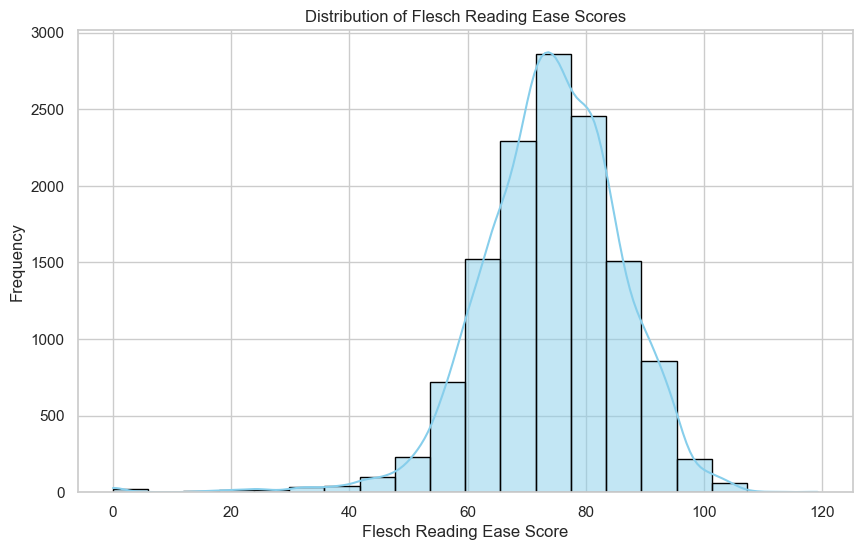

In [71]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a histogram of Flesch Reading Ease scores
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['flesch_reading_ease'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Flesch Reading Ease Scores')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

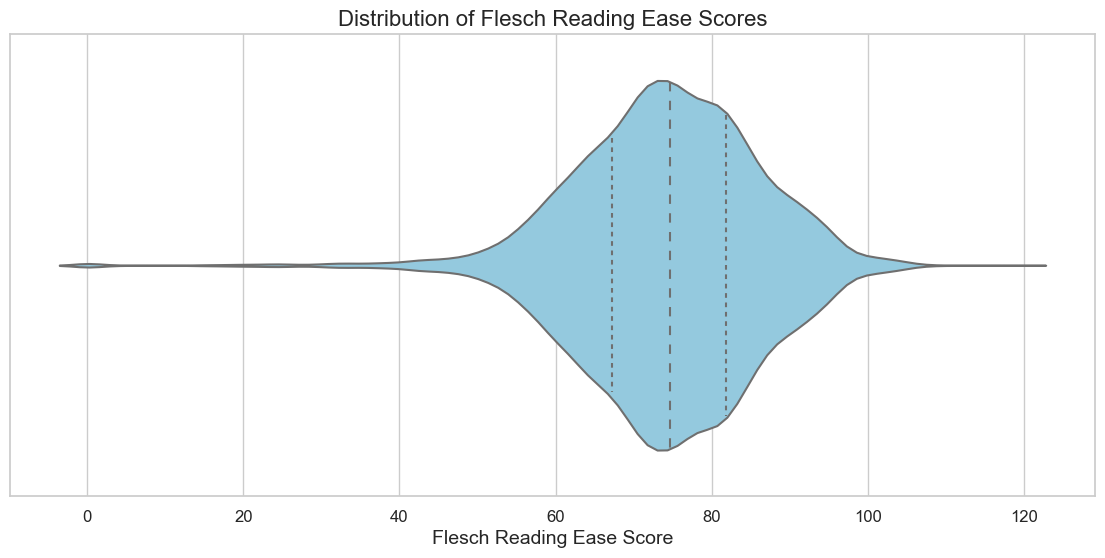

In [72]:
sns.set_theme(style="whitegrid", palette="pastel")

# Create a violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(x=df_clean['flesch_reading_ease'], color='skyblue', inner='quartile')

# Add labels and title with a larger font size
plt.title('Distribution of Flesch Reading Ease Scores', fontsize=16)
plt.xlabel('Flesch Reading Ease Score', fontsize=14)

# Customize tick parameters for better readability
plt.tick_params(axis='both', which='both', labelsize=12)

# Show the plot
plt.show()

In [73]:
# Define the bins and labels for Flesch Reading Ease categories
bins = [float('-inf'), 29.5, 49.5, 59.5, 69.5, 79.5, 89.5, float('inf')]
labels = ['Very difficult', 'Difficult', 'Fairly difficult', 'Standard', 'Fairly easy', 'Easy', 'Very easy']

# Cut the Flesch Reading Ease scores into the specified bins and assign categories
df_clean['flesch_category'] = pd.cut(df_clean['flesch_reading_ease'], bins=bins, labels=labels, include_lowest=True)

# Count the occurrences of each Flesch Reading Ease category
category_FRE_counts = df_clean['flesch_category'].value_counts()

# Display the counts for each category
print("Counts of Flesch Reading Ease Categories:")
print(category_FRE_counts)

Counts of Flesch Reading Ease Categories:
flesch_category
Fairly easy         4608
Easy                3136
Standard            2927
Very easy           1128
Fairly difficult     903
Difficult            215
Very difficult        61
Name: count, dtype: int64


In [74]:
# Add a new column for Flesch Reading Ease scores
df_clean['flesch_reading_ease'] = df_clean['essay'].apply(lambda x: textstat.flesch_reading_ease(x))

_________________________________________________

### Gunning Fog Index

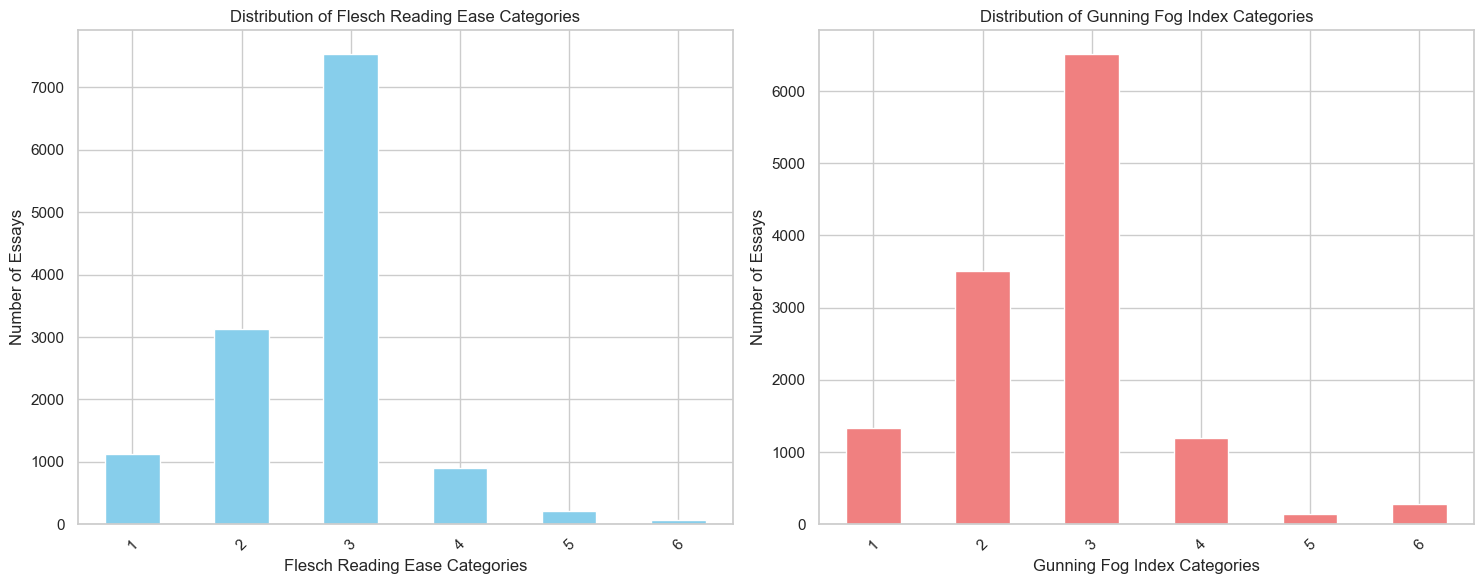

In [76]:
# Add new columns for Flesch Reading Ease and Gunning Fog Index scores
df_clean['flesch_reading_ease'] = df_clean['essay'].apply(textstat.flesch_reading_ease)
df_clean['gunning_fog_index'] = df_clean['essay'].apply(textstat.gunning_fog)

# Define mappings for Flesch Reading Ease scores to score points
score_point_mapping = {
    (89.51, float('inf')): 1,
    (79.51, 89.5): 2,
    (59.51, 79.5): 3,
    (49.51, 59.5): 4,
    (29.51, 49.5): 5,
    (float('-inf'), 29.5): 6,
}

# Map Flesch Reading Ease scores to score points
df_clean['flesch_score_point'] = df_clean['flesch_reading_ease'].apply(
    lambda score: next((point for (lower, upper), point in score_point_mapping.items() if lower <= score <= upper), None)
)

# Define mappings for Gunning Fog Index categories
gunning_bins = [float('-inf'), 6, 8, 12, 16, 18, float('inf')]
gunning_labels = [1, 2, 3, 4, 5, 6]

# Cut the Gunning Fog Index scores into categories
df_clean['gunning_category'] = pd.cut(df_clean['gunning_fog_index'], bins=gunning_bins, labels=gunning_labels, include_lowest=True)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Flesch Reading Ease
df_clean['flesch_score_point'].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=axs[0])
axs[0].set_title('Distribution of Flesch Reading Ease Categories')
axs[0].set_xlabel('Flesch Reading Ease Categories')
axs[0].set_ylabel('Number of Essays')
axs[0].tick_params(axis='x', rotation=45)

# Gunning Fog Index
df_clean['gunning_category'].value_counts().sort_index().plot(kind='bar', color='lightcoral', ax=axs[1])
axs[1].set_title('Distribution of Gunning Fog Index Categories')
axs[1].set_xlabel('Gunning Fog Index Categories')
axs[1].set_ylabel('Number of Essays')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [95]:
df_clean.head(3)

,essay_id,essay_set,essay,essay_length,tags_percentage,sent/leng ratio,nlp_spacy,transition_words_counts,num_sentences,mean_sentence_length,sentence_length_variance,flesch_reading_ease,flesch_category,gunning_fog_index,flesch_score_point,gunning_category
0,1,1,"Dear local newspaper, I think effects computer...",338,1.479290,11.0,"(Dear, local, newspaper, ,, I, think, effects,...",13,16,21.125,171.984375,74.02,Fairly easy,10.31,3,3
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",419,2.386635,19.0,"(Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",21,20,20.950,142.247500,67.08,Standard,10.21,3,3
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",279,2.508961,15.0,"(Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",17,14,18.600,153.306667,68.20,Standard,10.25,3,3


In [96]:
!pip install git+https://github.com/MCFreddie777/language-check.git

  Cloning https://github.com/MCFreddie777/language-check.git to c:\users\yaako\appdata\local\temp\pip-req-build-q9v24kso


  ERROR: Error [WinError 2] Le fichier spécifié est introuvable while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [77]:
spell_checker = SpellChecker()

def check_spelling_pyspellchecker(text):

    """
    The check_spelling_pyspellchecker function takes a piece of text as input, splits it into words, 
    and then checks each word for spelling errors the spell checker object. It returns a list of words 
    that are identified as misspelled.
    """
    
    words = text.split()
    misspelled_words = spell_checker.unknown(words)
    return misspelled_words

In [78]:
# Apply spell checker to each essay
df_clean['misspelled_words'] = df_clean['essay'].apply(check_spelling_pyspellchecker)

# Calculate misspelling score for each essay
df_clean['misspelling_score'] = df_clean['misspelled_words'].apply(len)

In [79]:
df_clean['misspelled_percentage'] = (df_clean['misspelling_score'] / df_clean['essay_length']) * 100

In [80]:
print(df_clean['misspelled_percentage'])

0        13.313609
1        10.262530
2        10.035842
3        15.267176
4        10.752688
           ...    
12973    11.597633
12974    14.285714
12975    14.198286
12976    14.946619
12977    11.134904
Name: misspelled_percentage, Length: 12978, dtype: float64


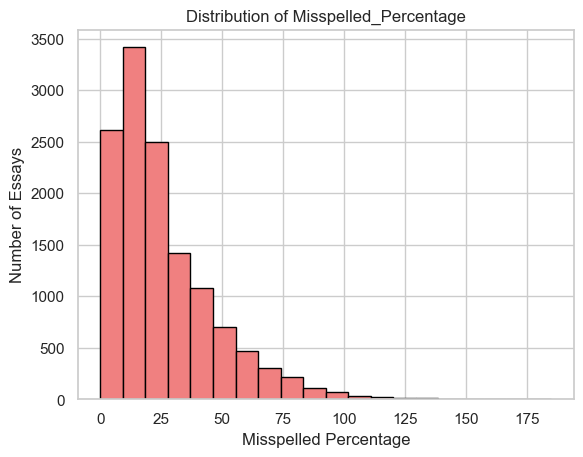

In [81]:
# Calculate misspelling score
df_clean['misspelled_percentage'] = df_clean['misspelled_words'].apply(len)

# Visualize distribution of misspelling scores
plt.hist(df_clean['misspelled_percentage'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Misspelled_Percentage')
plt.xlabel('Misspelled Percentage')
plt.ylabel('Number of Essays')
plt.show()

In [82]:
df_clean.columns

Index(['essay_id', 'essay_set', 'essay', 'domain1_score', 'domain2_score',
       'essay_length', 'tags_percentage', 'sent/leng ratio', 'nlp_spacy',
       'mean_sentence_length', 'sentence_length_variance',
       'transition_words_counts', 'num_sentences', 'flesch_reading_ease',
       'flesch_category', 'gunning_fog_index', 'flesch_score_point',
       'gunning_category', 'misspelled_words', 'misspelling_score',
       'misspelled_percentage'],
      dtype='object')

In [83]:
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords

def count_pos(text):
    """
    Analyzes the text to determine the percentages of words classified as adjectives, adverbs, nouns, and verbs.
    Input: Essay
    Output: Percentages of adjectives, adverbs, nouns, and verbs in the text.
    """

    # Tokenize the text
    sentences = sent_tokenize(text)
    
    # Filter out stopwords and tokenize words
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for sentence in sentences for word in word_tokenize(sentence) if word.isalpha() and word.lower() not in stop_words]

    # Tag the words with their parts of speech
    tagged_words = pos_tag(words)

    # Initialize counts for adjectives, adverbs, nouns, and verbs
    count_adjectives = count_adverbs = count_nouns = count_verbs = 0

    # Iterate over tagged words and categorize them
    for word, tag in tagged_words:
        if tag.startswith('JJ'):  # Adjectives
            count_adjectives += 1
        elif tag.startswith('RB'):  # Adverbs
            count_adverbs += 1
        elif tag.startswith('NN'):  # Nouns
            count_nouns += 1
        elif tag.startswith('VB'):  # Verbs
            count_verbs += 1
    
    # Calculate the percentages
    total_words = len(words)
    percent_adjectives = (count_adjectives / total_words) * 100
    percent_adverbs = (count_adverbs / total_words) * 100
    percent_nouns = (count_nouns / total_words) * 100
    percent_verbs = (count_verbs / total_words) * 100
    
    return percent_adjectives, percent_adverbs, percent_nouns, percent_verbs

In [84]:
# Apply the function to the DataFrame
df_clean['adjectives (%)'], df_clean['adverbs (%)'], df_clean['nouns (%)'], df_clean['verbs (%)']= zip(*df_clean['essay'].apply(count_pos))

In [105]:
df_clean.columns

Index(['essay_id', 'essay_set', 'essay', 'essay_length', 'tags_percentage',
       'sent/leng ratio', 'nlp_spacy', 'transition_words_counts',
       'num_sentences', 'mean_sentence_length', 'sentence_length_variance',
       'flesch_reading_ease', 'flesch_category', 'gunning_fog_index',
       'flesch_score_point', 'gunning_category', 'misspelled_words',
       'misspelling_score', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)'],
      dtype='object')

_________________

### Dale Chall Readability Score

In [85]:
# Add a new column for Dale-Chall Readability score
df_clean['dale_chall_readability'] = df_clean['essay'].apply(dale_chall_readability_score)

# Display the resulting column
print("Dale-Chall Readability Scores:")
print(df_clean['dale_chall_readability'])

Dale-Chall Readability Scores:
0        7.00
1        7.28
2        7.62
3        8.34
4        6.51
         ... 
12973    6.98
12974    6.01
12975    7.15
12976    6.70
12977    6.80
Name: dale_chall_readability, Length: 12978, dtype: float64


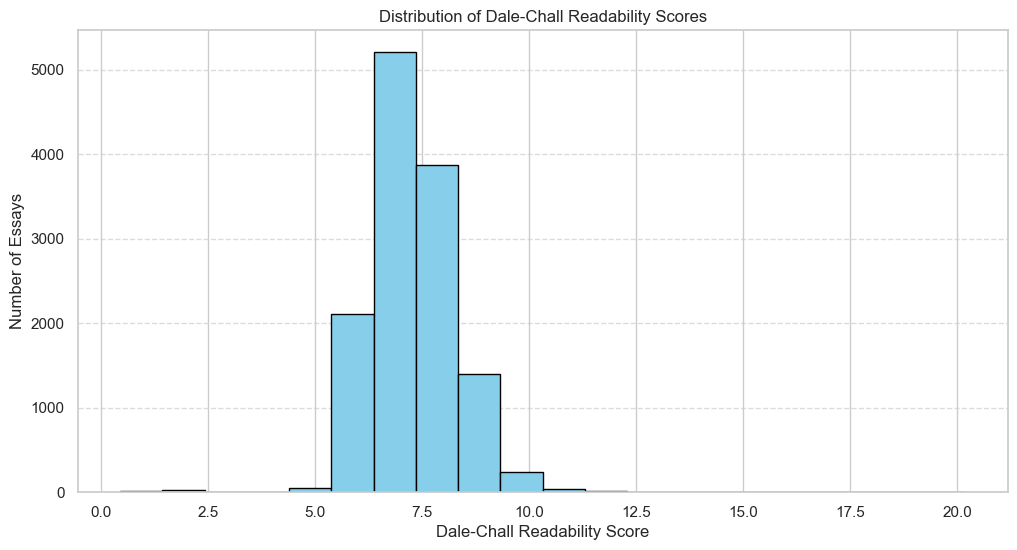

In [86]:
# Plot the distribution of Dale-Chall Readability scores
plt.figure(figsize=(12, 6))
plt.hist(df_clean['dale_chall_readability'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Dale-Chall Readability Scores')
plt.xlabel('Dale-Chall Readability Score')
plt.ylabel('Number of Essays')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [108]:
df_clean.columns

Index(['essay_id', 'essay_set', 'essay', 'essay_length', 'tags_percentage',
       'sent/leng ratio', 'nlp_spacy', 'transition_words_counts',
       'num_sentences', 'mean_sentence_length', 'sentence_length_variance',
       'flesch_reading_ease', 'flesch_category', 'gunning_fog_index',
       'flesch_score_point', 'gunning_category', 'misspelled_words',
       'misspelling_score', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'dale_chall_readability'],
      dtype='object')

_____________________________________________________________

### Automated Readibility index (ARI)

We use this formula to gauge the readability of a text.

In [87]:
# Function to calculate ARI for the essays
def calculate_ari(essay):
    # Counting characters, words, and sentences
    characters = len(re.sub(r'\s', '', essay))
    words = len(re.findall(r'\b\w+\b', essay))
    sentences = len(re.split(r'[.!?]', essay))

    # Calculating ARI
    ari = 4.71 * (characters / words) + 0.5 * (words / sentences) - 21.43
    return ari

# Applying the function to the 'text' column in df7_clean
df_clean['ARI'] = df_clean['essay'].apply(calculate_ari)

# Displaying the resulting DataFrame with ARI values
print(df_clean[['essay', 'ARI']])

                                                   essay        ARI
0      Dear local newspaper, I think effects computer...   9.561203
1      Dear @CAPS1 @CAPS2, I believe that using compu...   9.463414
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   9.023581
3      Dear Local Newspaper, @CAPS1 I have found that...  11.513191
4      Dear @LOCATION1, I know having computers has a...   7.160026
...                                                  ...        ...
12973   In most stories mothers and daughters are eit...  13.693947
12974   I never understood the meaning laughter is th...   4.040323
12975  When you laugh, is @CAPS5 out of habit, or is ...   7.623398
12976                                 Trippin' on fen...   5.644966
12977   Many people believe that laughter can improve...   6.929684

[12978 rows x 2 columns]


In [110]:
df_clean.columns

Index(['essay_id', 'essay_set', 'essay', 'essay_length', 'tags_percentage',
       'sent/leng ratio', 'nlp_spacy', 'transition_words_counts',
       'num_sentences', 'mean_sentence_length', 'sentence_length_variance',
       'flesch_reading_ease', 'flesch_category', 'gunning_fog_index',
       'flesch_score_point', 'gunning_category', 'misspelled_words',
       'misspelling_score', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'dale_chall_readability',
       'ARI'],
      dtype='object')

In [88]:
def interpret_ari_score(score):
    if score <= 6:
        return "Very easy to read (corresponds to 1st to 6th-grade level)"
    elif score <= 8:
        return "Easy to read (corresponds to 7th and 8th-grade level)"
    elif score <= 10:
        return "Fairly easy to read (corresponds to 9th and 10th-grade level)"
    elif score <= 12:
        return "Standard (corresponds to 11th and 12th-grade level)"
    elif score <= 15:
        return "Fairly difficult to read (corresponds to college or undergraduate level)"
    else:
        return "Difficult to read (corresponds to college graduate level)"

# Assuming df7_clean has a column named 'ARI'
df_clean['ARI Interpretation'] = df_clean['ARI'].apply(interpret_ari_score)

# Displaying the resulting DataFrame with ARI and its interpretation
df_clean[['essay', 'ARI', 'ARI Interpretation']]

,essay,ARI,ARI Interpretation
0,"Dear local newspaper, I think effects computer...",9.561203,Fairly easy to read (corresponds to 9th and 10...
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.463414,Fairly easy to read (corresponds to 9th and 10...
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",9.023581,Fairly easy to read (corresponds to 9th and 10...
3,"Dear Local Newspaper, @CAPS1 I have found that...",11.513191,Standard (corresponds to 11th and 12th-grade l...
4,"Dear @LOCATION1, I know having computers has a...",7.160026,Easy to read (corresponds to 7th and 8th-grade...
...,...,...,...
12973,In most stories mothers and daughters are eit...,13.693947,Fairly difficult to read (corresponds to colle...
12974,I never understood the meaning laughter is th...,4.040323,Very easy to read (corresponds to 1st to 6th-g...
12975,"When you laugh, is @CAPS5 out of habit, or is ...",7.623398,Easy to read (corresponds to 7th and 8th-grade...
12976,Trippin' on fen...,5.644966,Very easy to read (corresponds to 1st to 6th-g...


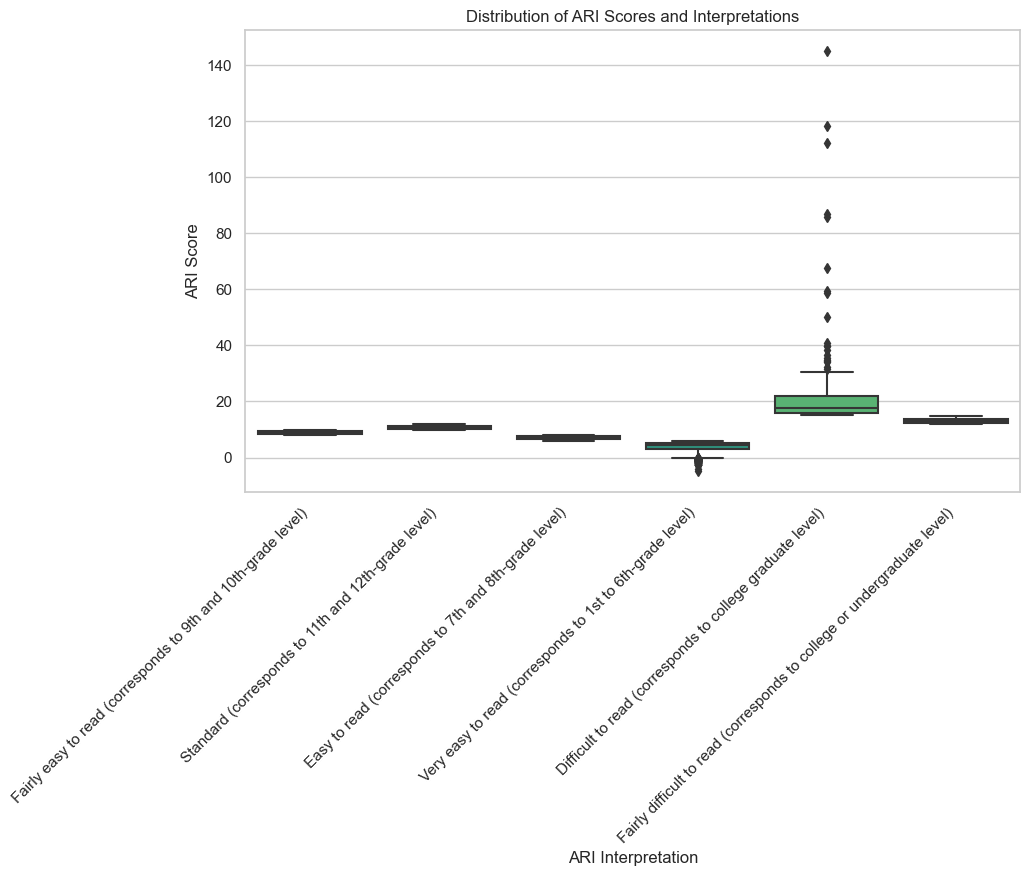

In [89]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a boxplot for ARI scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='ARI Interpretation', y='ARI', data=df_clean, palette='viridis')
plt.title('Distribution of ARI Scores and Interpretations')
plt.xlabel('ARI Interpretation')
plt.ylabel('ARI Score')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

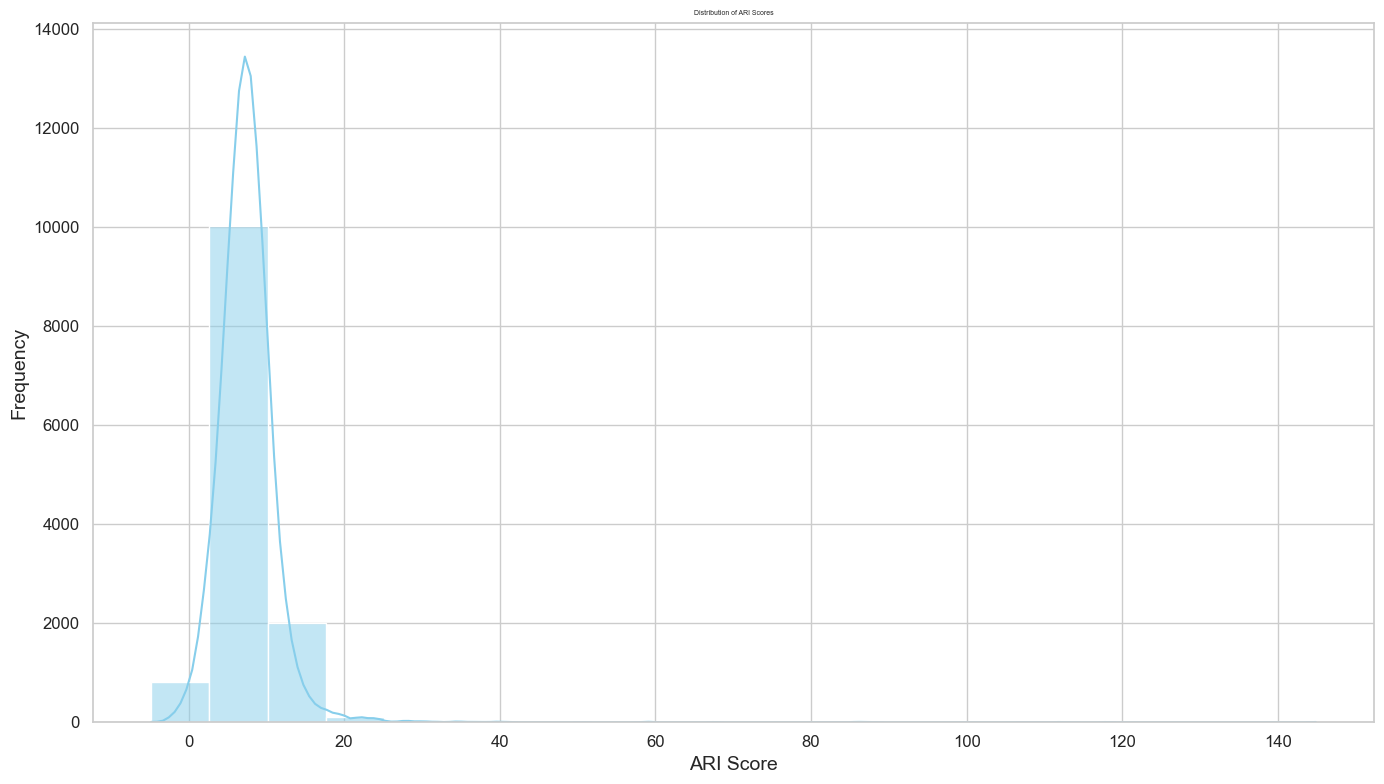

In [90]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a distribution plot for ARI scores
plt.figure(figsize=(14, 8))
sns.histplot(df_clean['ARI'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of ARI Scores', fontsize=5)
plt.xlabel('ARI Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

___________________________________________________________

### Smog Index

In [91]:
# Function to calculate Smog Index for a given text
def calculate_smog_index(essay):
    # Counting polysyllabic words and sentences
    polysyllabic_words = len(re.findall(r'\b\w{3,}\b', essay))
    sentences = len(re.split(r'[.!?]', essay))

    # Calculating Smog Index
    smog_index = 1.043 * math.sqrt((polysyllabic_words * 30) / sentences) + 3.1291
    return smog_index

# Applying the function to the 'text' column in df7_clean
df_clean['Smog Index'] = df_clean['essay'].apply(calculate_smog_index)

# Displaying the resulting DataFrame with Smog Index values
print(df_clean[['essay', 'Smog Index']])

                                                   essay  Smog Index
0      Dear local newspaper, I think effects computer...   25.641533
1      Dear @CAPS1 @CAPS2, I believe that using compu...   25.740801
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   25.007253
3      Dear Local Newspaper, @CAPS1 I have found that...   25.620205
4      Dear @LOCATION1, I know having computers has a...   22.650833
...                                                  ...         ...
12973   In most stories mothers and daughters are eit...   30.590208
12974   I never understood the meaning laughter is th...   20.904664
12975  When you laugh, is @CAPS5 out of habit, or is ...   22.903358
12976                                 Trippin' on fen...   20.940532
12977   Many people believe that laughter can improve...   22.445730

[12978 rows x 2 columns]


In [92]:
def interpret_smog_index(score):
    if score <= 6:
        return "Very easy to read (corresponds to 1st to 6th-grade level)"
    elif score <= 8:
        return "Easy to read (corresponds to 7th and 8th-grade level)"
    elif score <= 10:
        return "Fairly easy to read (corresponds to 9th and 10th-grade level)"
    elif score <= 12:
        return "Standard (corresponds to 11th and 12th-grade level)"
    elif score <= 15:
        return "Fairly difficult to read (corresponds to college or undergraduate level)"
    else:
        return "Difficult to read (corresponds to college graduate level)"

df_clean['Smog Index Interpretation'] = df_clean['Smog Index'].apply(interpret_smog_index)

df_clean[['essay', 'Smog Index', 'Smog Index Interpretation']]

,essay,Smog Index,Smog Index Interpretation
0,"Dear local newspaper, I think effects computer...",25.641533,Difficult to read (corresponds to college grad...
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",25.740801,Difficult to read (corresponds to college grad...
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",25.007253,Difficult to read (corresponds to college grad...
3,"Dear Local Newspaper, @CAPS1 I have found that...",25.620205,Difficult to read (corresponds to college grad...
4,"Dear @LOCATION1, I know having computers has a...",22.650833,Difficult to read (corresponds to college grad...
...,...,...,...
12973,In most stories mothers and daughters are eit...,30.590208,Difficult to read (corresponds to college grad...
12974,I never understood the meaning laughter is th...,20.904664,Difficult to read (corresponds to college grad...
12975,"When you laugh, is @CAPS5 out of habit, or is ...",22.903358,Difficult to read (corresponds to college grad...
12976,Trippin' on fen...,20.940532,Difficult to read (corresponds to college grad...


In [93]:
# Filter data for Smog Index scores less than or equal to 10
filtered_data_less_than_10 = df_clean[df_clean['Smog Index'] <= 10]

# Display the filtered data
filtered_data_less_than_10[['essay', 'Smog Index', 'Smog Index Interpretation']]

,essay,Smog Index,Smog Index Interpretation
2779,I do not think that censoship has a ightful pl...,4.441727,Very easy to read (corresponds to 1st to 6th-g...
6444,NO IMAGE,8.841846,Fairly easy to read (corresponds to 9th and 10...
10951,I forget to grab my helmet and ??? pads out of...,9.558584,Fairly easy to read (corresponds to 9th and 10...
11317,Being patience is like being a good person. If...,9.621723,Fairly easy to read (corresponds to 9th and 10...
11493,Patience I understand is the and tolerant pati...,8.748950,Fairly easy to read (corresponds to 9th and 10...
11692,The thing that ??? one @CAPS1 the most is when...,8.751306,Fairly easy to read (corresponds to 9th and 10...
11709,I am patient every thanks giving and @CAPS1. I...,9.888513,Fairly easy to read (corresponds to 9th and 10...
12025,??? ??? ??? was about the mid of @DATE1 my fam...,9.948597,Fairly easy to read (corresponds to 9th and 10...
12184,A time when I patient was during last @DATE1. ...,6.731879,Easy to read (corresponds to 7th and 8th-grade...


In [94]:
# Filter data for Smog Index scores less than or equal to 5
filtered_data_less_than_10 = df_clean[df_clean['Smog Index'] <= 7]

# Display the filtered data
filtered_data_less_than_10[['essay', 'Smog Index', 'Smog Index Interpretation']]

,essay,Smog Index,Smog Index Interpretation
2779,I do not think that censoship has a ightful pl...,4.441727,Very easy to read (corresponds to 1st to 6th-g...
12184,A time when I patient was during last @DATE1. ...,6.731879,Easy to read (corresponds to 7th and 8th-grade...


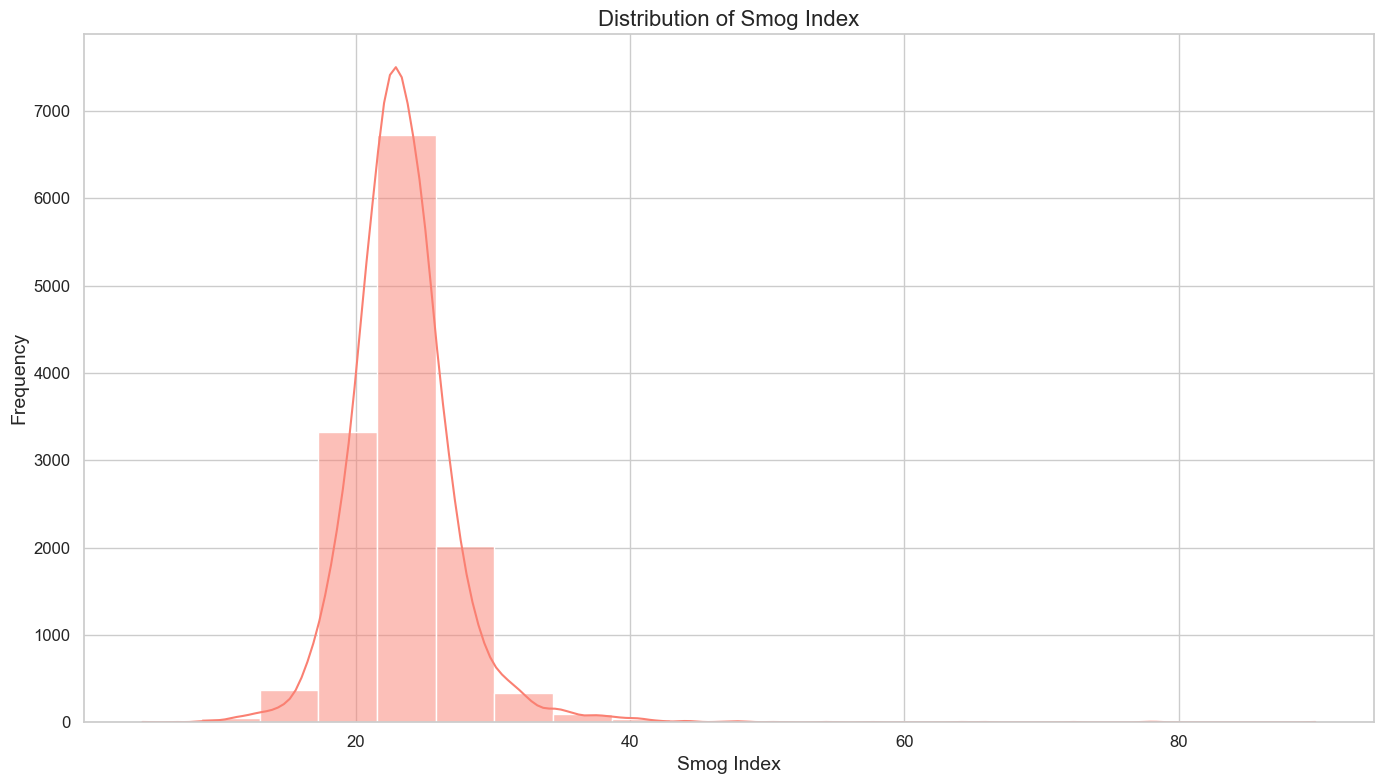

In [95]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a distribution plot for Smog Index
plt.figure(figsize=(14, 8))
sns.histplot(df_clean['Smog Index'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Smog Index', fontsize=16)
plt.xlabel('Smog Index', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

In [96]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a swarm plot for Smog Index
plt.figure(figsize=(14, 8))
sns.swarmplot(x=df_clean['Smog Index'], color='lightblue', size=5)
plt.title('Swarm Plot of Smog Index', fontsize=16)
plt.xlabel('Smog Index', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\yaako\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yaako\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

As shown in the plots above, we have a lot of essays that correspond to a score of 20 (difficult to read). There are only 7 essays that correspond to a score of 10 (fairly easy to read) and only 1 essay that corresponds to a score of 7 (easy to read).

___________________________________________

### Flesch-Kincaid

In [97]:
def count_syllables(word):
    # A simple syllable counter (may not be perfect)
    word = word.lower()
    vowels = "aeiouy"
    count = 0

    if word[0] in vowels:
        count += 1

    for i in range(1, len(word)):
        if word[i] in vowels and word[i - 1] not in vowels:
            count += 1

    if word.endswith("e"):
        count -= 1

    if count == 0:
        count += 1

    return count

def calculate_fkgl(essay):
    words = re.findall(r'\b\w+\b', essay)
    total_words = len(words)
    total_sentences = len(re.split(r'[.!?]', essay))
    total_syllables = sum(count_syllables(word) for word in words)

    fkgl = 0.39 * (total_words / total_sentences) + 11.8 * (total_syllables / total_words) - 15.59
    return fkgl

# Apply the function to the 'text' column in df7_clean
df_clean['Flesch-Kincaid Grade Level'] = df_clean['essay'].apply(calculate_fkgl)

# Display the resulting DataFrame with Flesch-Kincaid Grade Level values
print(df_clean[['essay', 'Flesch-Kincaid Grade Level']])

                                                   essay  \
0      Dear local newspaper, I think effects computer...   
1      Dear @CAPS1 @CAPS2, I believe that using compu...   
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3      Dear Local Newspaper, @CAPS1 I have found that...   
4      Dear @LOCATION1, I know having computers has a...   
...                                                  ...   
12973   In most stories mothers and daughters are eit...   
12974   I never understood the meaning laughter is th...   
12975  When you laugh, is @CAPS5 out of habit, or is ...   
12976                                 Trippin' on fen...   
12977   Many people believe that laughter can improve...   

       Flesch-Kincaid Grade Level  
0                        8.015412  
1                        9.114887  
2                        8.279661  
3                       10.071011  
4                        7.324704  
...                           ...  
12973                   11.

In [98]:
def interpret_fkgl(score):
    if score <= 6:
        return "Very easy to read (corresponds to 1st to 6th-grade level)"
    elif score <= 8:
        return "Easy to read (corresponds to 7th and 8th-grade level)"
    elif score <= 10:
        return "Fairly easy to read (corresponds to 9th and 10th-grade level)"
    elif score <= 12:
        return "Standard (corresponds to 11th and 12th-grade level)"
    elif score <= 15:
        return "Fairly difficult to read (corresponds to college or undergraduate level)"
    else:
        return "Difficult to read (corresponds to college graduate level)"


df_clean['FKGL Interpretation'] = df_clean['Flesch-Kincaid Grade Level'].apply(interpret_fkgl)

df_clean[['essay', 'Flesch-Kincaid Grade Level', 'FKGL Interpretation']]

,essay,Flesch-Kincaid Grade Level,FKGL Interpretation
0,"Dear local newspaper, I think effects computer...",8.015412,Fairly easy to read (corresponds to 9th and 10...
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.114887,Fairly easy to read (corresponds to 9th and 10...
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",8.279661,Fairly easy to read (corresponds to 9th and 10...
3,"Dear Local Newspaper, @CAPS1 I have found that...",10.071011,Standard (corresponds to 11th and 12th-grade l...
4,"Dear @LOCATION1, I know having computers has a...",7.324704,Easy to read (corresponds to 7th and 8th-grade...
...,...,...,...
12973,In most stories mothers and daughters are eit...,11.484587,Standard (corresponds to 11th and 12th-grade l...
12974,I never understood the meaning laughter is th...,3.655649,Very easy to read (corresponds to 1st to 6th-g...
12975,"When you laugh, is @CAPS5 out of habit, or is ...",6.805106,Easy to read (corresponds to 7th and 8th-grade...
12976,Trippin' on fen...,6.002589,Easy to read (corresponds to 7th and 8th-grade...


Flesch-Kincaid Grade Level 0-6: Very easy to read (corresponds to 1st to 6th-grade level)\\\
Flesch-Kincaid Grade Level 7-8: Easy to read (corresponds to 7th and 8th-grade level)\\\
Flesch-Kincaid Grade Level 9-10: Fairly easy to read (corresponds to 9th and 10th-grade level)\\\
Flesch-Kincaid Grade Level 11-12: Standard (corresponds to 11th and 12th-grade level)\\\
Flesch-Kincaid Grade Level 13-15: Fairly difficult to read (corresponds to college or undergraduate level)\\\
Flesch-Kincaid Grade Level 16-18: Difficult to read (corresponds to college graduate level)\\\

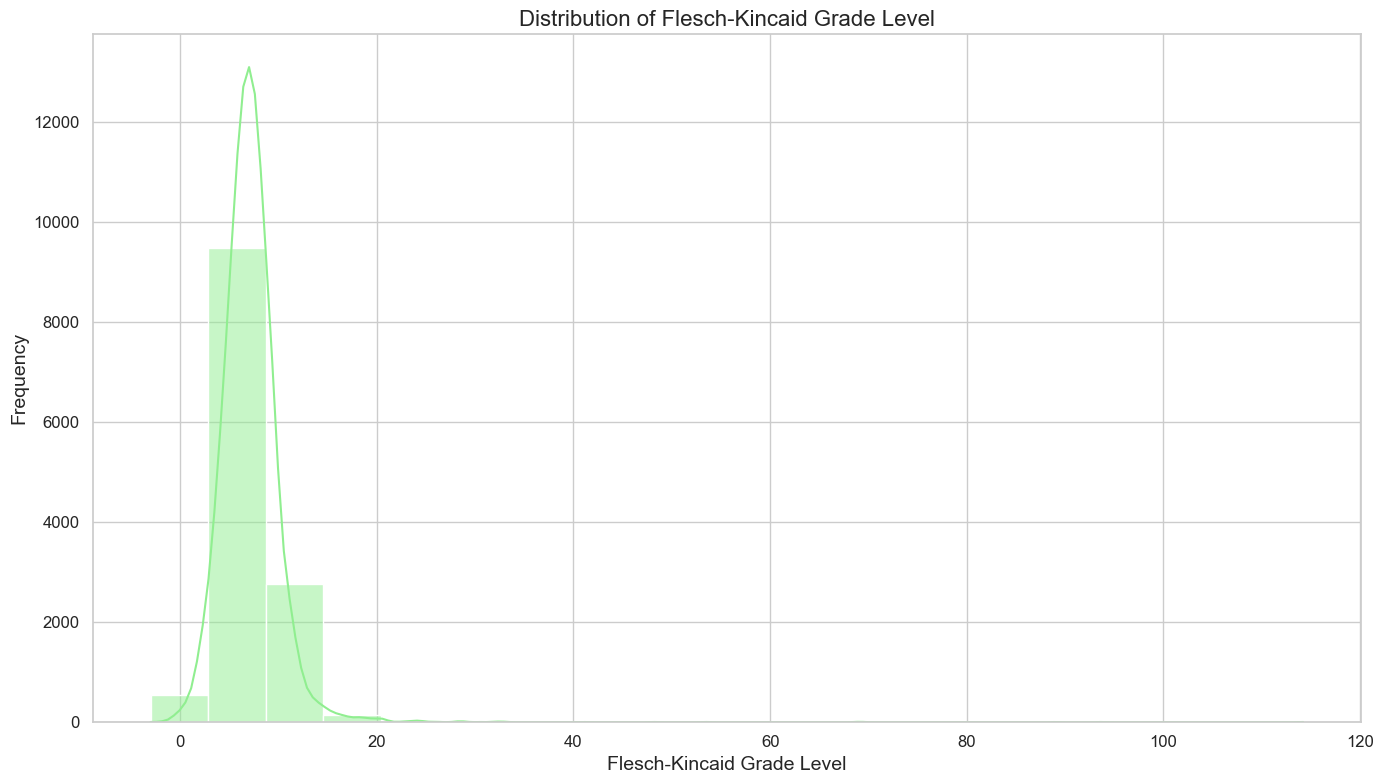

In [99]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a distribution plot for Flesch-Kincaid Grade Level
plt.figure(figsize=(14, 8))
sns.histplot(df_clean['Flesch-Kincaid Grade Level'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Flesch-Kincaid Grade Level', fontsize=16)
plt.xlabel('Flesch-Kincaid Grade Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

______________________________________

### Coleman-Liau

The Coleman-Liau Index is another readability index that estimates the U.S. school grade level needed to understand a piece of text.

In [100]:
def calculate_cli(essay):
    # Counting letters and sentences
    letters = len(re.findall(r'[a-zA-Z]', essay))
    sentences = len(re.split(r'[.!?]', essay))

    # Calculating average number of letters and sentences per 100 words
    words = re.findall(r'\b\w+\b', essay)
    avg_letters_per_100_words = (letters / len(words)) * 100
    avg_sentences_per_100_words = (sentences / len(words)) * 100

    # Calculating Coleman-Liau Index
    cli = 0.0588 * avg_letters_per_100_words - 0.296 * avg_sentences_per_100_words - 15.8
    return cli

# Apply the function to the 'text' column in df7_clean
df_clean['Coleman-Liau Index'] = df_clean['essay'].apply(calculate_cli)

# Display the resulting DataFrame with Coleman-Liau Index values
print(df_clean[['essay', 'Coleman-Liau Index']])

                                                   essay  Coleman-Liau Index
0      Dear local newspaper, I think effects computer...            7.592686
1      Dear @CAPS1 @CAPS2, I believe that using compu...            7.946383
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...            8.021060
3      Dear Local Newspaper, @CAPS1 I have found that...           10.483019
4      Dear @LOCATION1, I know having computers has a...            7.694461
...                                                  ...                 ...
12973   In most stories mothers and daughters are eit...            6.200927
12974   I never understood the meaning laughter is th...            4.138390
12975  When you laugh, is @CAPS5 out of habit, or is ...            7.136671
12976                                 Trippin' on fen...            5.949236
12977   Many people believe that laughter can improve...            6.826582

[12978 rows x 2 columns]


Coleman-Liau Index 0-6: Very easy to read (corresponds to 1st to 6th-grade level)\\\
Coleman-Liau Index 7-8: Easy to read (corresponds to 7th and 8th-grade level)\\\
Coleman-Liau Index 9-10: Fairly easy to read (corresponds to 9th and 10th-grade level)\\\
Coleman-Liau Index 11-12: Standard (corresponds to 11th and 12th-grade level)\\\
Coleman-Liau Index 13-15: Fairly difficult to read (corresponds to college or undergraduate level)\\\
Coleman-Liau Index 16-18: Difficult to read (corresponds to college graduate level)\\\

                                                   essay  Coleman-Liau Index
0      Dear local newspaper, I think effects computer...            7.592686
1      Dear @CAPS1 @CAPS2, I believe that using compu...            7.946383
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...            8.021060
3      Dear Local Newspaper, @CAPS1 I have found that...           10.483019
4      Dear @LOCATION1, I know having computers has a...            7.694461
...                                                  ...                 ...
12973   In most stories mothers and daughters are eit...            6.200927
12974   I never understood the meaning laughter is th...            4.138390
12975  When you laugh, is @CAPS5 out of habit, or is ...            7.136671
12976                                 Trippin' on fen...            5.949236
12977   Many people believe that laughter can improve...            6.826582

[12978 rows x 2 columns]


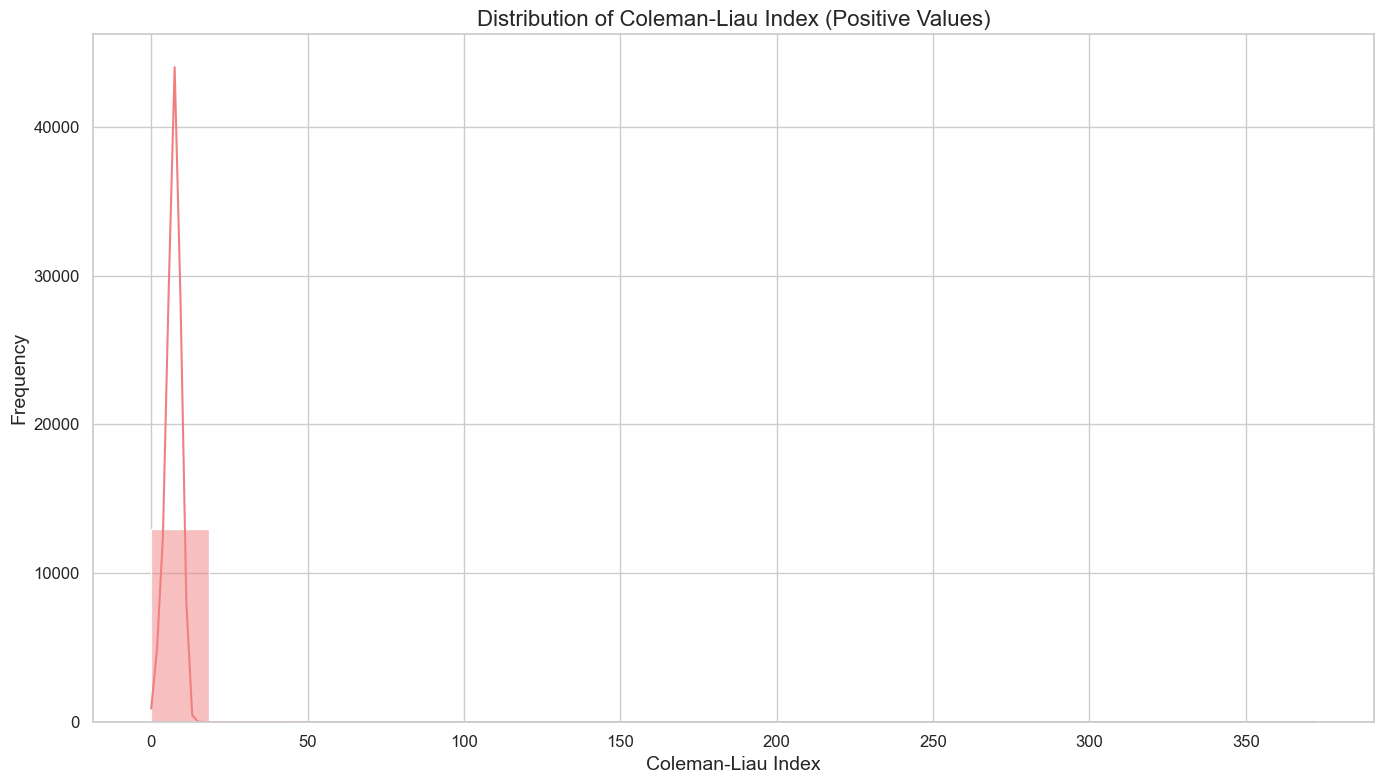

In [101]:
df_clean['Coleman-Liau Index'] = df_clean['essay'].apply(calculate_cli)

# Take the absolute value of the Coleman-Liau Index
df_clean['Coleman-Liau Index'] = df_clean['Coleman-Liau Index'].abs()

# Display the resulting DataFrame with Coleman-Liau Index values
print(df_clean[['essay', 'Coleman-Liau Index']])

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a distribution plot for Coleman-Liau Index (positive values only)
plt.figure(figsize=(14, 8))
sns.histplot(df_clean['Coleman-Liau Index'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Coleman-Liau Index (Positive Values)', fontsize=16)
plt.xlabel('Coleman-Liau Index', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

____________________________________________

# Syntatic Structure

## Roots of Sentence tree  (don't use !!!)

In [102]:
essay_split_into_sentences = df_clean['essay']

# Function to split essay into sentences
def split_into_sentences(essay):
    sentences = sent_tokenize(essay)
    return sentences

# Apply the function to the 'essay' column in the DataFrame
df_clean['Sentences'] = essay_split_into_sentences.apply(split_into_sentences)

# Display the resulting DataFrame with sentences
print(df_clean[['essay', 'Sentences']])

                                                   essay  \
0      Dear local newspaper, I think effects computer...   
1      Dear @CAPS1 @CAPS2, I believe that using compu...   
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3      Dear Local Newspaper, @CAPS1 I have found that...   
4      Dear @LOCATION1, I know having computers has a...   
...                                                  ...   
12973   In most stories mothers and daughters are eit...   
12974   I never understood the meaning laughter is th...   
12975  When you laugh, is @CAPS5 out of habit, or is ...   
12976                                 Trippin' on fen...   
12977   Many people believe that laughter can improve...   

                                               Sentences  
0      [Dear local newspaper, I think effects compute...  
1      [Dear @CAPS1 @CAPS2, I believe that using comp...  
2      [Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...  
3      [Dear Local Newspaper, @CAPS1 I have

In [103]:
df_clean

,essay_id,essay_set,essay,domain1_score,domain2_score,essay_length,tags_percentage,sent/leng ratio,nlp_spacy,mean_sentence_length,...,verbs (%),dale_chall_readability,ARI,ARI Interpretation,Smog Index,Smog Index Interpretation,Flesch-Kincaid Grade Level,FKGL Interpretation,Coleman-Liau Index,Sentences
0,1,1,"Dear local newspaper, I think effects computer...",8.0,3.333889,338,1.479290,11.0,"(Dear, local, newspaper, ,, I, think, effects,...",21.125000,...,22.666667,7.00,9.561203,Fairly easy to read (corresponds to 9th and 10...,25.641533,Difficult to read (corresponds to college grad...,8.015412,Fairly easy to read (corresponds to 9th and 10...,7.592686,"[Dear local newspaper, I think effects compute..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3.333889,419,2.386635,19.0,"(Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",20.950000,...,28.169014,7.28,9.463414,Fairly easy to read (corresponds to 9th and 10...,25.740801,Difficult to read (corresponds to college grad...,9.114887,Fairly easy to read (corresponds to 9th and 10...,7.946383,"[Dear @CAPS1 @CAPS2, I believe that using comp..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,3.333889,279,2.508961,15.0,"(Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",18.600000,...,26.356589,7.62,9.023581,Fairly easy to read (corresponds to 9th and 10...,25.007253,Difficult to read (corresponds to college grad...,8.279661,Fairly easy to read (corresponds to 9th and 10...,8.021060,"[Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop..."
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,3.333889,524,7.824427,25.0,"(Dear, Local, Newspaper, ,, @CAPS1, I, have, f...",19.407407,...,25.781250,8.34,11.513191,Standard (corresponds to 11th and 12th-grade l...,25.620205,Difficult to read (corresponds to college grad...,10.071011,Standard (corresponds to 11th and 12th-grade l...,10.483019,"[Dear Local Newspaper, @CAPS1 I have found tha..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,3.333889,465,0.860215,31.0,"(Dear, @LOCATION1, ,, I, know, having, compute...",15.500000,...,21.658986,6.51,7.160026,Easy to read (corresponds to 7th and 8th-grade...,22.650833,Difficult to read (corresponds to college grad...,7.324704,Easy to read (corresponds to 7th and 8th-grade...,7.694461,"[Dear @LOCATION1, I know having computers has ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35.0,3.333889,845,6.508876,28.0,"( , In, most, stories, mothers, and, daughters...",20.634146,...,22.375691,6.98,13.693947,Fairly difficult to read (corresponds to colle...,30.590208,Difficult to read (corresponds to college grad...,11.484587,Standard (corresponds to 11th and 12th-grade l...,6.200927,[ In most stories mothers and daughters are ei...
12974,21628,8,I never understood the meaning laughter is th...,32.0,3.333889,546,5.860806,34.0,"( , I, never, understood, the, meaning, laught...",14.102564,...,22.916667,6.01,4.040323,Very easy to read (corresponds to 1st to 6th-g...,20.904664,Difficult to read (corresponds to college grad...,3.655649,Very easy to read (corresponds to 1st to 6th-g...,4.138390,[ I never understood the meaning laughter is t...
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40.0,3.333889,817,6.976744,38.0,"(When, you, laugh, ,, is, @CAPS5, out, of, hab...",18.222222,...,27.544910,7.15,7.623398,Easy to read (corresponds to 7th and 8th-grade...,22.903358,Difficult to read (corresponds to college grad...,6.805106,Easy to read (corresponds to 7th and 8th-grade...,7.136671,"[When you laugh, is @CAPS5 out of habit, or is..."
12976,21630,8,Trippin' on fen...,40.0,3.333889,562,3.558719,41.0,"( , Trippin, ', ...",14.410256,...,25.000000,6.70,5.644966,Very easy to read (corresponds to 1st to 6th-g...,20.940532,Difficult to read (corresponds to college grad...,6.002589,Easy to read (corresponds to 7th and 8th-grade...,5.949236,[ Trippin' 

In [129]:
df_clean.columns

Index(['essay_id', 'essay_set', 'essay', 'essay_length', 'tags_percentage',
       'sent/leng ratio', 'nlp_spacy', 'transition_words_counts',
       'num_sentences', 'mean_sentence_length', 'sentence_length_variance',
       'flesch_reading_ease', 'flesch_category', 'gunning_fog_index',
       'flesch_score_point', 'gunning_category', 'misspelled_words',
       'misspelling_score', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'dale_chall_readability',
       'ARI', 'ARI Interpretation', 'Smog Index', 'Smog Index Interpretation',
       'Flesch-Kincaid Grade Level', 'FKGL Interpretation',
       'Coleman-Liau Index', 'Sentences'],
      dtype='object')

In [104]:
import spacy
import pandas as pd

# Load spaCy model
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])
nlp.add_pipe('sentencizer')  # Add sentencizer to the pipeline

def calculate_coherence(essay):
    doc = nlp(essay)
    sentences = [sent for sent in doc.sents if any(token.has_vector for token in sent)]
    
    if len(sentences) < 2:
        return 0

    similarities = []
    for i in range(len(sentences) - 1):
        similarity = sentences[i].similarity(sentences[i+1])
        similarities.append(similarity)

    return sum(similarities) / len(similarities)

# Sample DataFrame

# Apply the coherence calculation to each essay
df_clean['coherence_score'] = df_clean['essay'].apply(calculate_coherence)

print(df_clean)

       essay_id  essay_set                                              essay  \
0             1          1  Dear local newspaper, I think effects computer...   
1             2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4             5          1  Dear @LOCATION1, I know having computers has a...   
...         ...        ...                                                ...   
12973     21626          8   In most stories mothers and daughters are eit...   
12974     21628          8   I never understood the meaning laughter is th...   
12975     21629          8  When you laugh, is @CAPS5 out of habit, or is ...   
12976     21630          8                                 Trippin' on fen...   
12977     21633          8   Many people believe that laughter can improve...   

       domain1_score  domai

In [105]:
import split
def lexical_diversity(text):
    tokens = text.split()
    total_words = len(tokens)
    unique_words = len(set(tokens))
    diversity_score = unique_words / total_words
    return diversity_score


# Calcul de la diversité lexicale sans avertissement
df_clean.loc[:, 'lexical_diversity_score'] = df_clean['essay'].apply(lexical_diversity)

# Affichage des premières lignes pour vérifier les résultats
df_clean[['essay', 'lexical_diversity_score']]

,essay,lexical_diversity_score
0,"Dear local newspaper, I think effects computer...",0.544379
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.515513
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.598566
3,"Dear Local Newspaper, @CAPS1 I have found that...",0.524809
4,"Dear @LOCATION1, I know having computers has a...",0.486022
...,...,...
12973,In most stories mothers and daughters are eit...,0.450888
12974,I never understood the meaning laughter is th...,0.478022
12975,"When you laugh, is @CAPS5 out of habit, or is ...",0.504284
12976,Trippin' on fen...,0.517794


In [106]:
df_clean


,essay_id,essay_set,essay,domain1_score,domain2_score,essay_length,tags_percentage,sent/leng ratio,nlp_spacy,mean_sentence_length,...,ARI,ARI Interpretation,Smog Index,Smog Index Interpretation,Flesch-Kincaid Grade Level,FKGL Interpretation,Coleman-Liau Index,Sentences,coherence_score,lexical_diversity_score
0,1,1,"Dear local newspaper, I think effects computer...",8.0,3.333889,338,1.479290,11.0,"(Dear, local, newspaper, ,, I, think, effects,...",21.125000,...,9.561203,Fairly easy to read (corresponds to 9th and 10...,25.641533,Difficult to read (corresponds to college grad...,8.015412,Fairly easy to read (corresponds to 9th and 10...,7.592686,"[Dear local newspaper, I think effects compute...",0.772611,0.544379
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3.333889,419,2.386635,19.0,"(Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",20.950000,...,9.463414,Fairly easy to read (corresponds to 9th and 10...,25.740801,Difficult to read (corresponds to college grad...,9.114887,Fairly easy to read (corresponds to 9th and 10...,7.946383,"[Dear @CAPS1 @CAPS2, I believe that using comp...",0.786303,0.515513
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,3.333889,279,2.508961,15.0,"(Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",18.600000,...,9.023581,Fairly easy to read (corresponds to 9th and 10...,25.007253,Difficult to read (corresponds to college grad...,8.279661,Fairly easy to read (corresponds to 9th and 10...,8.021060,"[Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...",0.789054,0.598566
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,3.333889,524,7.824427,25.0,"(Dear, Local, Newspaper, ,, @CAPS1, I, have, f...",19.407407,...,11.513191,Standard (corresponds to 11th and 12th-grade l...,25.620205,Difficult to read (corresponds to college grad...,10.071011,Standard (corresponds to 11th and 12th-grade l...,10.483019,"[Dear Local Newspaper, @CAPS1 I have found tha...",0.797839,0.524809
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,3.333889,465,0.860215,31.0,"(Dear, @LOCATION1, ,, I, know, having, compute...",15.500000,...,7.160026,Easy to read (corresponds to 7th and 8th-grade...,22.650833,Difficult to read (corresponds to college grad...,7.324704,Easy to read (corresponds to 7th and 8th-grade...,7.694461,"[Dear @LOCATION1, I know having computers has ...",0.800443,0.486022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35.0,3.333889,845,6.508876,28.0,"( , In, most, stories, mothers, and, daughters...",20.634146,...,13.693947,Fairly difficult to read (corresponds to colle...,30.590208,Difficult to read (corresponds to college grad...,11.484587,Standard (corresponds to 11th and 12th-grade l...,6.200927,[ In most stories mothers and daughters are ei...,0.806808,0.450888
12974,21628,8,I never understood the meaning laughter is th...,32.0,3.333889,546,5.860806,34.0,"( , I, never, understood, the, meaning, laught...",14.102564,...,4.040323,Very easy to read (corresponds to 1st to 6th-g...,20.904664,Difficult to read (corresponds to college grad...,3.655649,Very easy to read (corresponds to 1st to 6th-g...,4.138390,[ I never understood the meaning laughter is t...,0.681592,0.478022
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40.0,3.333889,817,6.976744,38.0,"(When, you, laugh, ,, is, @CAPS5, out, of, hab...",18.222222,...,7.623398,Easy to read (corresponds to 7th and 8th-grade...,22.903358,Difficult to read (corresponds to college grad...,6.805106,Easy to read (corresponds to 7th and 8th-grade...,7.136671,"[When you laugh, is @CAPS5 out of habit, or is...",0.692091,0.504284
12976,21630,8,Trippin' on fen...,40.0,3.333889,562,3.558719,41.0,"( , Trippin, ', ...",14.410256,...,5.644966,Very easy to read (corresponds to 1st to 6th-g...,20.940532,Difficult to read (corresponds to college grad...,6.002589,Easy to read (corresponds to 7th and 8th-grade...,5.94

In [107]:
df_clean.head(3)

,essay_id,essay_set,essay,domain1_score,domain2_score,essay_length,tags_percentage,sent/leng ratio,nlp_spacy,mean_sentence_length,...,ARI,ARI Interpretation,Smog Index,Smog Index Interpretation,Flesch-Kincaid Grade Level,FKGL Interpretation,Coleman-Liau Index,Sentences,coherence_score,lexical_diversity_score
0,1,1,"Dear local newspaper, I think effects computer...",8.0,3.333889,338,1.479290,11.0,"(Dear, local, newspaper, ,, I, think, effects,...",21.125,...,9.561203,Fairly easy to read (corresponds to 9th and 10...,25.641533,Difficult to read (corresponds to college grad...,8.015412,Fairly easy to read (corresponds to 9th and 10...,7.592686,"[Dear local newspaper, I think effects compute...",0.772611,0.544379
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3.333889,419,2.386635,19.0,"(Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",20.950,...,9.463414,Fairly easy to read (corresponds to 9th and 10...,25.740801,Difficult to read (corresponds to college grad...,9.114887,Fairly easy to read (corresponds to 9th and 10...,7.946383,"[Dear @CAPS1 @CAPS2, I believe that using comp...",0.786303,0.515513
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,3.333889,279,2.508961,15.0,"(Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",18.600,...,9.023581,Fairly easy to read (corresponds to 9th and 10...,25.007253,Difficult to read (corresponds to college grad...,8.279661,Fairly easy to read (corresponds to 9th and 10...,8.021060,"[Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...",0.789054,0.598566


In [108]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

# Assurez-vous d'avoir téléchargé les ressources nécessaires de NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def calculer_variation_lexicale(texte):
    """
    Calcule les ratios d'adjectifs, noms, et verbes dans le texte donné.
    """
    # Séparation du texte en mots
    mots = word_tokenize(texte)
    # Attribution d'une catégorie grammaticale à chaque mot
    etiquettes = pos_tag(mots)
    
    # Comptabilisation des catégories grammaticales
    compte = Counter(etiquette for mot, etiquette in etiquettes)
    
    # Nombre total de mots
    total_mots = len(mots)
    ratio_noms = compte['NN'] / total_mots if 'NN' in compte else 0
    ratio_adjectifs = compte['JJ'] / total_mots if 'JJ' in compte else 0
    ratio_verbes = compte['VB'] / total_mots if 'VB' in compte else 0
    
    return ratio_noms, ratio_adjectifs, ratio_verbes

# Exemple d'utilisation de la fonction
# Appliquer la fonction et créer des colonnes séparées pour chaque ratio
df_clean[['ratio_noms', 'ratio_adjectifs', 'ratio_verbes']] = df_clean['essay'].apply(
    lambda essai: pd.Series(calculer_variation_lexicale(essai))
)

# Afficher les résultats
print(df_clean[['essay','ratio_noms', 'ratio_adjectifs', 'ratio_verbes']])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaako\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yaako\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


                                                   essay  ratio_noms  \
0      Dear local newspaper, I think effects computer...    0.142487   
1      Dear @CAPS1 @CAPS2, I believe that using compu...    0.118534   
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...    0.124601   
3      Dear Local Newspaper, @CAPS1 I have found that...    0.119476   
4      Dear @LOCATION1, I know having computers has a...    0.127660   
...                                                  ...         ...   
12973   In most stories mothers and daughters are eit...    0.091360   
12974   I never understood the meaning laughter is th...    0.118619   
12975  When you laugh, is @CAPS5 out of habit, or is ...    0.110331   
12976                                 Trippin' on fen...    0.102339   
12977   Many people believe that laughter can improve...    0.097967   

       ratio_adjectifs  ratio_verbes  
0             0.051813      0.054404  
1             0.040948      0.062500  
2             0.04

In [109]:
# List of awl words 
awl_words = [
    "analyze", "approach", "area", "assess", "assume", "authority", "available", "benefit", "concept", "consistent",
    "constitute", "context", "contract", "create", "data", "define", "derive", "distribute", "economic", "environment",
    "establish", "estimate", "evidence", "export", "factor", "finance", "formula", "function", "identify", "income",
    "indicate", "individual", "interpret", "involve", "issue", "labour", "legal", "legislation", "major", "method",
    "occur", "percent", "period", "policy", "principle", "procedure", "process", "require", "research", "response",
    "role", "section", "sector", "significant", "similar", "source", "specific", "structure", "theory", "variable",
    "abandon", "abstract", "academic", "access", "adequate", "adjust", "alter", "alternative", "ambiguous", "analogy",
    "appendix", "appreciate", "approxiMate", "arbitrary", "aspect", "assemble", "assert", "assign", "assist",
    "assume", "automatic", "bias", "bond", "brief", "bulk", "capable", "category", "cease", "chaotic", "cite",
    "civil", "classic", "coherent", "collapse", "colleague", "commence", "commission", "commit", "communicate",
    "community", "compatible", "compensate", "compile", "complex", "comply", "compoNent", "compute", "conceive",
    "concept", "conclude", "conducive", "confer", "confine", "confirm", "conflict", "consent", "consequent",
    "conserve", "considerable", "consist", "constant", "constituent", "constrain", "construct", "consult",
    "consume", "contact", "contemplate", "contend", "context", "contract", "contrary", "contribute", "controversy",
    "convene", "converge", "convert", "convince", "cooperate", "coordinate", "core", "corporate", "correspond",
    "criteria", "deduce", "defect", "defend", "deficit", "define", "degrade", "delegate", "derive", "designate",
    "despite", "detect", "deviate", "device", "devote", "diminish", "discrete", "discriminate", "displace",
    "display", "dispose", "dispute", "dissipate", "distort", "distribute", "domain", "dominate", "draft", "duration",
    "dynamic", "economist", "edit", "elevate", "eliminate", "emerge", "emphasis", "empirical", "enable", "encompass",
    "endeavour", "entity", "equivalent", "erode", "error", "establish", "estimate", "ethic", "ethnic", "evaluate",
    "evident", "evolve", "exceed", "exclude", "execute", "exhibit", "expand", "expel", "expertise", "explicit",
    "exploit", "export", "expose", "external", "extract", "facilitate", "factor", "feature", "fee", "file", "final",
    "finance", "flexible", "fluctuate", "focus", "format", "formulate", "forthcoming", "found", "framework",
    "function", "fundamental", "generate", "generation", "globe", "goal", "grade", "grant", "guarantee", "guideline",
    "highlight", "hypothesis", "identical", "ideology", "ignore", "illustrate", "immerse", "immigrate", "impact",
    "implicate", "implicit", "impose", "incentive", "incidence", "inclined", "inconsistent", "incorporate",
    "index", "indicate", "individual", "inequate", "inhibit", "initial", "initiate", "innovate", "input", "institute",
    "instrument", "integrate", "integrity", "intelligence", "intense", "interact", "intermediate", "internal",
    "interpret", "interval", "intervene", "intrinsic", "invest", "isolate", "issue", "item", "job", "judicial",
    "justification", "label", "labour", "layer", "lecture", "legitimate", "licence", "likewise", "link", "locate",
    "logic", "maintain", "manipulate", "manual", "margin", "mature", "maximum", "media", "mediate", "medical",
    "mental", "method", "migrate", "minimal", "minimise", "minimum", "ministry", "monitor", "motivate", "mutual",
    "negate", "neutral", "nevertheless", "norm", "notion", "nuclear", "objective", "obligation", "occupy", "occur",
    "odd", "offset", "ongoing", "option", "orient", "outcome", "output", "overall", "overlap", "overview", "panel",
    "paradigm", "parameter", "participate", "partner", "passive", "perceive", "percent", "peripheral", "persist",
    "perspective", "phase", "phenomenon", "philosophy", "physical", "portion", "precede", "precise", "predict",
    "preliminary", "presume", "previous", "primary", "prime", "principal", "prior", "priority", "professional",
    "prohibit", "project", "promote", "proportion", "prospect", "protocol", "psychology", "publication", "publish",
    "purchase", "pursue", "qualitative", "quantify", "quote", "radical", "random", "range", "ratio", "rational",
    "react", "recovery", "recur", "redeem", "refine", "reflect", "reform", "regime", "region", "register",
    "regulate", "reinforce", "reject", "relax", "release", "relevant", "rely", "rely", "remove", "restrain",
    "retain", "reveal", "reverse", "revolution", "rigid", "route", "scenario", "schedule", "scheme", "scope",
    "sector", "secure", "seek", "select", "sequence", "series", "sex", "shift", "significant", "similar", "simulate"]

In [110]:
# Exemple de Academic Word List simplifiée pour l'exemple

def count_awl_words(text):
    """
    Compte le nombre de mots de la Academic Word List présents dans le texte.
    
    :param text: Le texte à analyser.
    :return: Le nombre de mots AWL trouvés dans le texte.
    """
    # Convertir le texte en minuscules et le diviser en mots
    words = text.lower().split()
    # Compter le nombre de mots AWL
    awl_word_count = sum(1 for word in words if word in awl_words)
    return awl_word_count

# Exemple d'utilisation
# Appliquer la fonction à chaque texte dans la série et stocker les résultats dans une nouvelle colonne
df_clean['count_awl_words'] = df_clean['essay'].apply(count_awl_words)

# Afficher les résultats
print(df_clean[['essay', 'count_awl_words']])

                                                   essay  count_awl_words
0      Dear local newspaper, I think effects computer...                3
1      Dear @CAPS1 @CAPS2, I believe that using compu...                8
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...                4
3      Dear Local Newspaper, @CAPS1 I have found that...                7
4      Dear @LOCATION1, I know having computers has a...                0
...                                                  ...              ...
12973   In most stories mothers and daughters are eit...                4
12974   I never understood the meaning laughter is th...                1
12975  When you laugh, is @CAPS5 out of habit, or is ...                2
12976                                 Trippin' on fen...                1
12977   Many people believe that laughter can improve...                6

[12978 rows x 2 columns]


In [111]:
import string

def calculate_punctuation_overuse(text):
    """
    Calcule le score de surutilisation de la ponctuation dans un texte.
    
    :param text: Le texte à analyser.
    :return: Le score de surutilisation de la ponctuation, calculé comme le nombre de signes de ponctuation divisé par le nombre total de mots.
    """
    # Compter le nombre total de signes de ponctuation
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    
    # Compter le nombre total de mots
    word_count = len(text.split())
    
    # Éviter la division par zéro
    if word_count == 0:
        return 0
    
    # Calculer le score de surutilisation de la ponctuation
    punctuation_overuse_score = punctuation_count / word_count
    return punctuation_overuse_score

# Appliquer la fonction à chaque texte dans la série et stocker les résultats dans une nouvelle colonne
df_clean['calculate_punctuation_overuse'] = df_clean['essay'].apply(calculate_punctuation_overuse)

# Afficher les résultats
print(df_clean[['essay', 'calculate_punctuation_overuse']])

                                                   essay  \
0      Dear local newspaper, I think effects computer...   
1      Dear @CAPS1 @CAPS2, I believe that using compu...   
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3      Dear Local Newspaper, @CAPS1 I have found that...   
4      Dear @LOCATION1, I know having computers has a...   
...                                                  ...   
12973   In most stories mothers and daughters are eit...   
12974   I never understood the meaning laughter is th...   
12975  When you laugh, is @CAPS5 out of habit, or is ...   
12976                                 Trippin' on fen...   
12977   Many people believe that laughter can improve...   

       calculate_punctuation_overuse  
0                           0.162722  
1                           0.109785  
2                           0.121864  
3                           0.173664  
4                           0.118280  
...                              ...  
12973 

In [161]:
df_clean['gunning_category']

0        3
1        3
2        3
3        3
4        3
        ..
12973    4
12974    1
12975    3
12976    2
12977    3
Name: gunning_category, Length: 12978, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [155]:
df_clean.head(2)


,essay_id,essay_set,essay,essay_length,tags_percentage,sent/leng ratio,nlp_spacy,transition_words_counts,num_sentences,mean_sentence_length,...,Flesch-Kincaid Grade Level,FKGL Interpretation,Coleman-Liau Index,Sentences,Parse Trees,coherence_score,lexical_diversity_score,calculer_variation_lexicale,count_awl_words,calculate_punctuation_overuse
0,1,1,"Dear local newspaper, I think effects computer...",338,1.479290,11.0,"(Dear, local, newspaper, ,, I, think, effects,...",13,16,21.125,...,8.015412,Fairly easy to read (corresponds to 9th and 10...,7.592686,"[Dear local newspaper, I think effects compute...","[[(Dear, NNP), [('local', 'JJ'), ('newspaper',...",0.772611,0.544379,"(0.14248704663212436, 0.05181347150259067, 0.0...",3,0.162722
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",419,2.386635,19.0,"(Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",21,20,20.950,...,9.114887,Fairly easy to read (corresponds to 9th and 10...,7.946383,"[Dear @CAPS1 @CAPS2, I believe that using comp...","[[(Dear, NNP), (@, NNP), (CAPS1, NNP), (@, NNP...",0.786303,0.515513,"(0.11853448275862069, 0.040948275862068964, 0....",8,0.109785


In [112]:
df_clean['Smog Index Interpretation']

0        Difficult to read (corresponds to college grad...
1        Difficult to read (corresponds to college grad...
2        Difficult to read (corresponds to college grad...
3        Difficult to read (corresponds to college grad...
4        Difficult to read (corresponds to college grad...
                               ...                        
12973    Difficult to read (corresponds to college grad...
12974    Difficult to read (corresponds to college grad...
12975    Difficult to read (corresponds to college grad...
12976    Difficult to read (corresponds to college grad...
12977    Difficult to read (corresponds to college grad...
Name: Smog Index Interpretation, Length: 12978, dtype: object

In [ ]:
['essay_length', 'tags_percentage', 'sent/leng ratio', 'transition_words_counts', 'num_sentences', 'mean_sentence_length', 'Flesch-Kincaid Grade Level', 'Coleman-Liau Index', 'coherence_score', 'lexical_diversity_score'] 

In [209]:
df_clean.dtypes

essay_id                            int64
essay_set                           int64
essay                              object
essay_length                        int64
tags_percentage                   float64
sent/leng ratio                   float64
nlp_spacy                          object
transition_words_counts             int64
num_sentences                       int64
mean_sentence_length              float64
sentence_length_variance          float64
flesch_reading_ease               float64
flesch_category                  category
gunning_fog_index                 float64
flesch_score_point                  int64
gunning_category                 category
misspelled_words                   object
misspelling_score                   int64
misspelled_percentage               int64
adjectives (%)                    float64
adverbs (%)                       float64
nouns (%)                         float64
verbs (%)                         float64
dale_chall_readability            

In [113]:
from sklearn.preprocessing import MinMaxScaler

# Liste des caractéristiques à normaliser
features_to_normalize =['essay_length', 'tags_percentage',
       'sent/leng ratio', 'transition_words_counts',
       'num_sentences', 'mean_sentence_length', 'sentence_length_variance',
        'flesch_reading_ease', 'gunning_fog_index',
       'flesch_score_point',
       'misspelling_score', 'misspelled_percentage', 'adjectives (%)',
       'adverbs (%)', 'nouns (%)', 'verbs (%)', 'dale_chall_readability',
       'ARI',  'Smog Index',
       'Flesch-Kincaid Grade Level', 
       'Coleman-Liau Index', 'coherence_score',
       'lexical_diversity_score',
       'count_awl_words', 'calculate_punctuation_overuse', 'ratio_noms',
       'ratio_adjectifs', 'ratio_verbes']
# Initialiser le MinMaxScaler
scaler = MinMaxScaler()

# Supposons que 'df' est votre DataFrame
# Ajuster et transformer les données
df[features_to_normalize] = scaler.fit_transform(df_clean[features_to_normalize])

# Vos données sont maintenant normalisées et prêtes à être utilisées dans un modèle


In [114]:
df[features_to_normalize]

,essay_length,tags_percentage,sent/leng ratio,transition_words_counts,num_sentences,mean_sentence_length,sentence_length_variance,flesch_reading_ease,gunning_fog_index,flesch_score_point,...,Smog Index,Flesch-Kincaid Grade Level,Coleman-Liau Index,coherence_score,lexical_diversity_score,count_awl_words,calculate_punctuation_overuse,ratio_noms,ratio_adjectifs,ratio_verbes
0,0.316384,0.040938,0.015576,0.149425,0.024883,0.142736,0.013710,0.856293,0.080219,0.4,...,0.247912,0.094064,0.020387,0.797042,0.396747,0.125000,0.012614,0.284974,0.181347,0.244819
1,0.392655,0.066049,0.028037,0.241379,0.031104,0.141554,0.011340,0.834214,0.079376,0.4,...,0.249072,0.103445,0.021337,0.811167,0.358529,0.333333,0.008510,0.237069,0.143319,0.281250
2,0.260829,0.069434,0.021807,0.195402,0.021773,0.125676,0.012222,0.837777,0.079713,0.4,...,0.240494,0.096319,0.021538,0.814005,0.468493,0.166667,0.009447,0.249201,0.167732,0.186901
3,0.491525,0.216536,0.037383,0.195402,0.041991,0.131131,0.010820,0.812452,0.084437,0.4,...,0.247662,0.111602,0.028150,0.823067,0.370837,0.291667,0.013462,0.238953,0.240589,0.228314
4,0.435970,0.023806,0.046729,0.218391,0.046656,0.104730,0.003469,0.851966,0.060818,0.4,...,0.212938,0.088172,0.020661,0.825753,0.319481,0.000000,0.009169,0.255319,0.155706,0.365571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,0.793785,0.180129,0.042056,0.724138,0.041991,0.139420,0.020007,0.827882,0.107634,0.4,...,0.305782,0.123662,0.016650,0.832320,0.272963,0.166667,0.014862,0.182721,0.177259,0.236842
12974,0.512241,0.162194,0.051402,0.367816,0.066874,0.095288,0.007252,0.910664,0.043610,0.0,...,0.192518,0.056869,0.011110,0.703145,0.308889,0.041667,0.017037,0.237237,0.215465,0.162162
12975,0.767420,0.193077,0.057632,0.482759,0.082426,0.123123,0.019363,0.840672,0.073049,0.4,...,0.215891,0.083739,0.019163,0.713975,0.343661,0.083333,0.018407,0.220662,0.182548,0.148947
12976,0.527307,0.098485,0.062305,0.333333,0.065319,0.097367,0.004177,0.881140,0.055757,0.2,...,0.192938,0.076892,0.015974,0.750841,0.361548,0.041667,0.017242,0.204678,0.184211,0.125000


In [115]:
df_clean

,essay_id,essay_set,essay,domain1_score,domain2_score,essay_length,tags_percentage,sent/leng ratio,nlp_spacy,mean_sentence_length,...,FKGL Interpretation,Coleman-Liau Index,Sentences,coherence_score,lexical_diversity_score,ratio_noms,ratio_adjectifs,ratio_verbes,count_awl_words,calculate_punctuation_overuse
0,1,1,"Dear local newspaper, I think effects computer...",8.0,3.333889,338,1.479290,11.0,"(Dear, local, newspaper, ,, I, think, effects,...",21.125000,...,Fairly easy to read (corresponds to 9th and 10...,7.592686,"[Dear local newspaper, I think effects compute...",0.772611,0.544379,0.142487,0.051813,0.054404,3,0.162722
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3.333889,419,2.386635,19.0,"(Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",20.950000,...,Fairly easy to read (corresponds to 9th and 10...,7.946383,"[Dear @CAPS1 @CAPS2, I believe that using comp...",0.786303,0.515513,0.118534,0.040948,0.062500,8,0.109785
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,3.333889,279,2.508961,15.0,"(Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",18.600000,...,Fairly easy to read (corresponds to 9th and 10...,8.021060,"[Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...",0.789054,0.598566,0.124601,0.047923,0.041534,4,0.121864
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,3.333889,524,7.824427,25.0,"(Dear, Local, Newspaper, ,, @CAPS1, I, have, f...",19.407407,...,Standard (corresponds to 11th and 12th-grade l...,10.483019,"[Dear Local Newspaper, @CAPS1 I have found tha...",0.797839,0.524809,0.119476,0.068740,0.050736,7,0.173664
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,3.333889,465,0.860215,31.0,"(Dear, @LOCATION1, ,, I, know, having, compute...",15.500000,...,Easy to read (corresponds to 7th and 8th-grade...,7.694461,"[Dear @LOCATION1, I know having computers has ...",0.800443,0.486022,0.127660,0.044487,0.081238,0,0.118280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35.0,3.333889,845,6.508876,28.0,"( , In, most, stories, mothers, and, daughters...",20.634146,...,Standard (corresponds to 11th and 12th-grade l...,6.200927,[ In most stories mothers and daughters are ei...,0.806808,0.450888,0.091360,0.050645,0.052632,4,0.191716
12974,21628,8,I never understood the meaning laughter is th...,32.0,3.333889,546,5.860806,34.0,"( , I, never, understood, the, meaning, laught...",14.102564,...,Very easy to read (corresponds to 1st to 6th-g...,4.138390,[ I never understood the meaning laughter is t...,0.681592,0.478022,0.118619,0.061562,0.036036,1,0.219780
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40.0,3.333889,817,6.976744,38.0,"(When, you, laugh, ,, is, @CAPS5, out, of, hab...",18.222222,...,Easy to read (corresponds to 7th and 8th-grade...,7.136671,"[When you laugh, is @CAPS5 out of habit, or is...",0.692091,0.504284,0.110331,0.052156,0.033099,2,0.237454
12976,21630,8,Trippin' on fen...,40.0,3.333889,562,3.558719,41.0,"( , Trippin, ', ...",14.410256,...,Easy to read (corresponds to 7th and 8th-grade...,5.949236,[ Trippin' on fe...,0.727826,0.517794,0.102339,0.052632,0.027778,1,0.222420


# VAlid TEST

In [ ]:
X_train = df[features]

In [ ]:
y_train = df[score_columns]

In [238]:
file1 = r"C:\Users\yaako\OneDrive\Bureau\M1 Data Science\Projet machine learning/valid_set.xlsx"

# Read the Excel file into a pandas DataFrame
Valid_Set = pd.read_excel(file1)

In [244]:
Valid_Set['essay_length'] = Valid_Set['essay'].str.split().str.len()
Valid_Set['tag_counts'] = Valid_Set['essay'].apply(lambda x: count_words_by_category(x, special_words))

Valid_Set['total_tags'] = Valid_Set['tag_counts'].apply(lambda x: sum(value for value in x.values()))


In [250]:
Valid_Set['num_sentences'] = Valid_Set['essay'].apply(count_sentences)

In [247]:
Valid_Set = Valid_Set.assign(tags_percentage=lambda x: (x['total_tags'] / x['essay_length']) * 100)

# contains_tag
Valid_Set = Valid_Set.assign(contains_tag=Valid_Set['essay'].str.contains('@').astype(int))

# sent/leng ratio
Valid_Set['sent/leng ratio'] = Valid_Set['essay'].apply(calculate_sentences_to_paragraphs_ratio)

# Convert essays to a list
essays = Valid_Set['essay'].tolist()
docs = analyze_nlp(essays)  # Process essays in batches

# If you need to store the processed docs back into the DataFrame, you can do so as follows:
# Note: Storing spaCy Doc objects directly in a DataFrame can be memory-intensive.
# You might want to extract and store only the necessary information from these docs.
Valid_Set['nlp_spacy'] = docs

# 'mean_sentence_length', 'sentence_length_variance'
Valid_Set[['mean_sentence_length', 'sentence_length_variance']] = Valid_Set['essay'].apply(
    lambda essay: pd.Series(calculate_sentence_stats(essay))
)

# Count transition words
Valid_Set['transition_words_counts'] = Valid_Set['nlp_spacy'].apply(count_transition_words)

# Calculate Flesch Reading Ease for each essay and create a new column
Valid_Set['flesch_reading_ease'] = Valid_Set['essay'].apply(flesch_reading_ease)

# Set all negative values to 0
Valid_Set['flesch_reading_ease'] = Valid_Set['flesch_reading_ease'].apply(lambda x: max(0, x))

# Cut the Flesch Reading Ease scores into the specified bins and assign categories
Valid_Set['flesch_category'] = pd.cut(Valid_Set['flesch_reading_ease'], bins=bins, labels=labels, include_lowest=True)

# Count the occurrences of each Flesch Reading Ease category
category_FRE_counts = Valid_Set['flesch_category'].value_counts()

Valid_Set['flesch_reading_ease'] = Valid_Set['essay'].apply(lambda x: textstat.flesch_reading_ease(x))

Valid_Set['flesch_reading_ease'] = Valid_Set['essay'].apply(textstat.flesch_reading_ease)
Valid_Set['gunning_fog_index'] = Valid_Set['essay'].apply(textstat.gunning_fog)

Valid_Set['flesch_score_point'] = Valid_Set['flesch_reading_ease'].apply(
    lambda score: next((point for (lower, upper), point in score_point_mapping.items() if lower <= score <= upper), None)
)



# Apply spell checker to each essay
Valid_Set['misspelled_words'] = Valid_Set['essay'].apply(check_spelling_pyspellchecker)

# Calculate misspelling score for each essay
Valid_Set['misspelling_score'] = Valid_Set['misspelled_words'].apply(len)

Valid_Set['misspelled_percentage'] = (Valid_Set['misspelling_score'] / Valid_Set['essay_length']) * 100

# POS percentages
Valid_Set['adjectives (%)'], Valid_Set['adverbs (%)'], Valid_Set['nouns (%)'], Valid_Set['verbs (%)'] = zip(*Valid_Set['essay'].apply(count_pos))

Valid_Set['dale_chall_readability'] = Valid_Set['essay'].apply(dale_chall_readability_score)

# Applying the function to the 'text' column in df7_clean
Valid_Set['ARI'] = Valid_Set['essay'].apply(calculate_ari)

Valid_Set['ARI Interpretation'] = Valid_Set['ARI'].apply(interpret_ari_score)

Valid_Set['Smog Index'] = Valid_Set['essay'].apply(calculate_smog_index)

Valid_Set['Smog Index Interpretation'] = Valid_Set['Smog Index'].apply(interpret_smog_index)

Valid_Set['Flesch-Kincaid Grade Level'] = Valid_Set['essay'].apply(calculate_fkgl)

Valid_Set['FKGL Interpretation'] = Valid_Set['Flesch-Kincaid Grade Level'].apply(interpret_fkgl)

Valid_Set['Coleman-Liau Index'] = Valid_Set['essay'].apply(calculate_cli)
Valid_Set['Coleman-Liau Index'] = Valid_Set['Coleman-Liau Index'].abs()

essay_split_into_sentences = Valid_Set['essay']
Valid_Set['Sentences'] = essay_split_into_sentences.apply(split_into_sentences)

Valid_Set['coherence_score'] = Valid_Set['essay'].apply(calculate_coherence)

Valid_Set.loc[:, 'lexical_diversity_score'] = Valid_Set['essay'].apply(lexical_diversity)

Valid_Set[['ratio_noms', 'ratio_adjectifs', 'ratio_verbes']] = Valid_Set['essay'].apply(
    lambda essai: pd.Series(calculer_variation_lexicale(essai))
)

Valid_Set['count_awl_words'] = Valid_Set['essay'].apply(count_awl_words)
Valid_Set['calculate_punctuation_overuse'] = Valid_Set['essay'].apply(calculate_punctuation_overuse)


In [283]:
from sklearn.multioutput import MultiOutputRegressor

features = [
    'essay_length', 'tags_percentage', 'sent/leng ratio', 'transition_words_counts',
    'num_sentences', 'mean_sentence_length', 'sentence_length_variance',
    'flesch_reading_ease', 'gunning_fog_index', 'flesch_score_point', 
    'dale_chall_readability', 'ARI', 'Smog Index', 'Flesch-Kincaid Grade Level',
    'Coleman-Liau Index', 'coherence_score', 'lexical_diversity_score', 
     'count_awl_words', 'calculate_punctuation_overuse','ratio_noms',
       'ratio_adjectifs', 'ratio_verbes'
]

# y est un DataFrame de toutes vos cibles


# Votre X reste le même, constitué de vos caractéristiques prédictives normalisées

# Initialiser le MinMaxScaler
scaler = MinMaxScaler()

# Supposons que 'df' est votre DataFrame
# Ajuster et transformer les données
Valid_Set[features] = scaler.fit_transform(Valid_Set[features])

In [284]:
X_test = Valid_Set[features]

In [285]:
X_test

,essay_length,tags_percentage,sent/leng ratio,transition_words_counts,num_sentences,mean_sentence_length,sentence_length_variance,flesch_reading_ease,gunning_fog_index,flesch_score_point,...,Smog Index,Flesch-Kincaid Grade Level,Coleman-Liau Index,coherence_score,lexical_diversity_score,count_awl_words,calculate_punctuation_overuse,ratio_noms,ratio_adjectifs,ratio_verbes
0,0.230536,0.0,0.139535,0.197368,0.147727,0.136686,0.003560,0.799593,0.084277,0.4,...,0.334875,0.203445,0.695038,0.781266,0.424643,0.000000,0.239961,0.240000,0.436364,0.212987
1,0.311426,0.0,0.232558,0.328947,0.238636,0.119231,0.001439,0.871786,0.067247,0.2,...,0.276609,0.151591,0.316708,0.785732,0.347956,0.238095,0.163199,0.254958,0.169972,0.398219
2,0.443883,0.0,0.151163,0.250000,0.170455,0.226154,0.003118,0.818593,0.118336,0.4,...,0.446203,0.259935,0.546176,0.862341,0.238277,0.047619,0.080826,0.322718,0.201699,0.323324
3,0.362993,0.0,0.197674,0.236842,0.272727,0.115705,0.001211,0.841816,0.064248,0.4,...,0.282709,0.164032,0.529964,0.804150,0.190322,0.095238,0.156069,0.278049,0.182927,0.457143
4,0.456016,0.0,0.395349,0.289474,0.386364,0.102489,0.000991,0.848337,0.053991,0.4,...,0.271232,0.179453,0.584892,0.843258,0.242404,0.047619,0.109143,0.250000,0.362903,0.283410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,0.575329,0.0,0.395349,0.539474,0.431818,0.115587,0.001139,0.905602,0.057765,0.0,...,0.271571,0.144242,0.317670,0.811333,0.215599,0.095238,0.140958,0.137285,0.366615,0.264988
4214,0.715875,0.0,0.546512,0.473684,0.545455,0.113782,0.001852,0.874463,0.058829,0.2,...,0.272365,0.148056,0.345008,0.774795,0.193022,0.000000,0.168423,0.229064,0.233990,0.209184
4215,0.555106,0.0,0.348837,0.381579,0.340909,0.141282,0.002169,0.828809,0.083890,0.4,...,0.314978,0.186665,0.491902,0.812204,0.324365,0.047619,0.162768,0.275200,0.368000,0.253029
4216,0.569262,0.0,0.337209,0.578947,0.329545,0.149867,0.003961,0.888374,0.073924,0.2,...,0.336164,0.177554,0.360614,0.776365,0.168662,0.095238,0.156700,0.220840,0.303266,0.255054


In [286]:
file2 = r"C:\Users\yaako\OneDrive\Bureau\M1 Data Science\Projet machine learning/valid_sample_submission_5_column.csv"

# Read the Excel file into a pandas DataFrame
predict = pd.read_csv(file2)

In [287]:
predict['predicted_score']

0        7
1        8
2        9
3        9
4        9
        ..
4813    33
4814    35
4815    38
4816    32
4817    39
Name: predicted_score, Length: 4818, dtype: int64

In [266]:
import pandas as pd

# Simuler vos données (remplacer cela par la lecture de votre fichier CSV)
# predict = pd.read_csv('chemin_vers_votre_fichier.csv')

# Normalisation Min-Max de la colonne 'predicted_score'
min_score = predict['predicted_score'].min()
max_score = predict['predicted_score'].max()
predict['predicted_score_normalized'] = (predict['predicted_score'] - min_score) / (max_score - min_score)


In [288]:
y_test = predict['predicted_score']

In [289]:
model.fit(X_train, y_train)
# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Train_test_split

In [119]:
# score_columns est la liste de toutes vos colonnes de score

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = [
    'essay_length', 'tags_percentage', 'sent/leng ratio', 'transition_words_counts',
    'num_sentences', 'mean_sentence_length', 'sentence_length_variance',
    'flesch_reading_ease', 'gunning_fog_index', 'flesch_score_point', 
    'dale_chall_readability', 'ARI', 'Smog Index', 'Flesch-Kincaid Grade Level',
    'Coleman-Liau Index', 'coherence_score', 'lexical_diversity_score', 
     'count_awl_words', 'calculate_punctuation_overuse','ratio_noms',
       'ratio_adjectifs', 'ratio_verbes'
]

# y est un DataFrame de toutes vos cibles
y = df[score_columns]

# Votre X reste le même, constitué de vos caractéristiques prédictives normalisées
X = df[features]  # Assurez-vous que cette liste a été définie correctement

# Division des données, entraînement et évaluation comme précédemment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multioutput_model = MultiOutputRegressor(LinearRegression())
multioutput_model.fit(X_train, y_train)
y_pred = multioutput_model.predict(X_test)


Text(0.5, 1.0, 'Distribution de x_train')

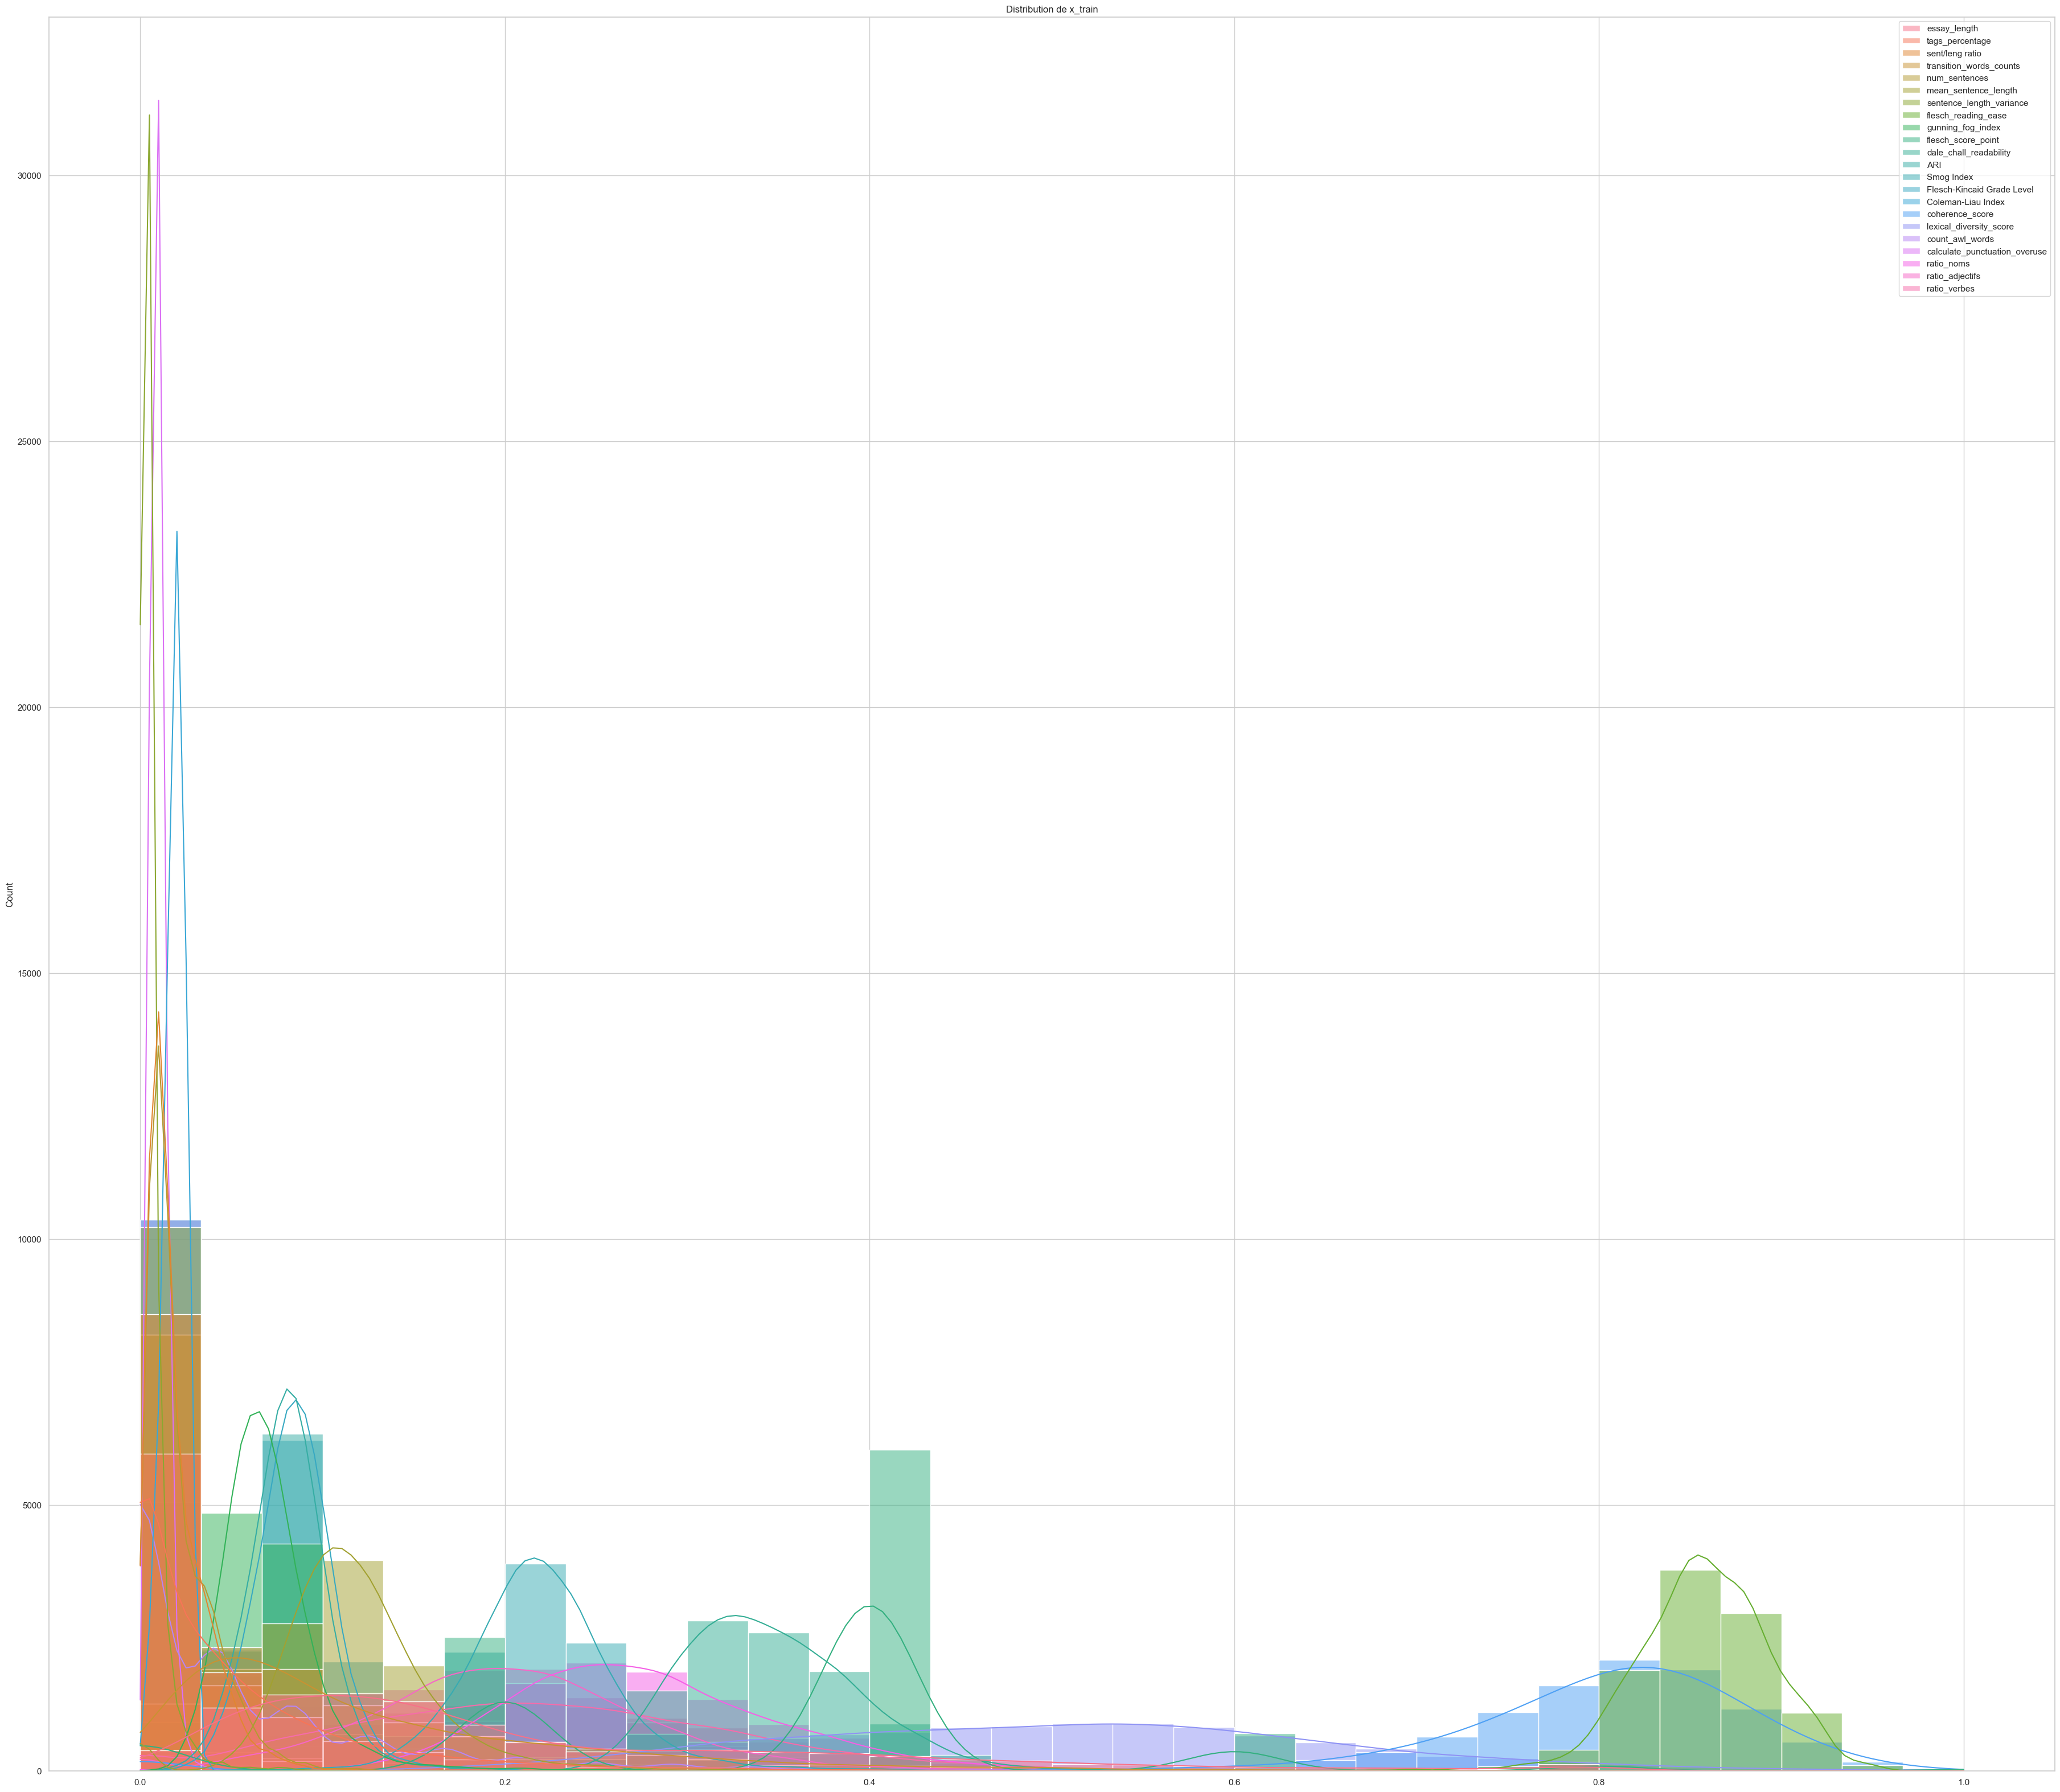

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pour xtrain
plt.figure(figsize=(100, 40))
plt.subplot(1, 2, 1)
sns.histplot(X_train, kde=True, bins=30)
plt.title('Distribution de x_train')



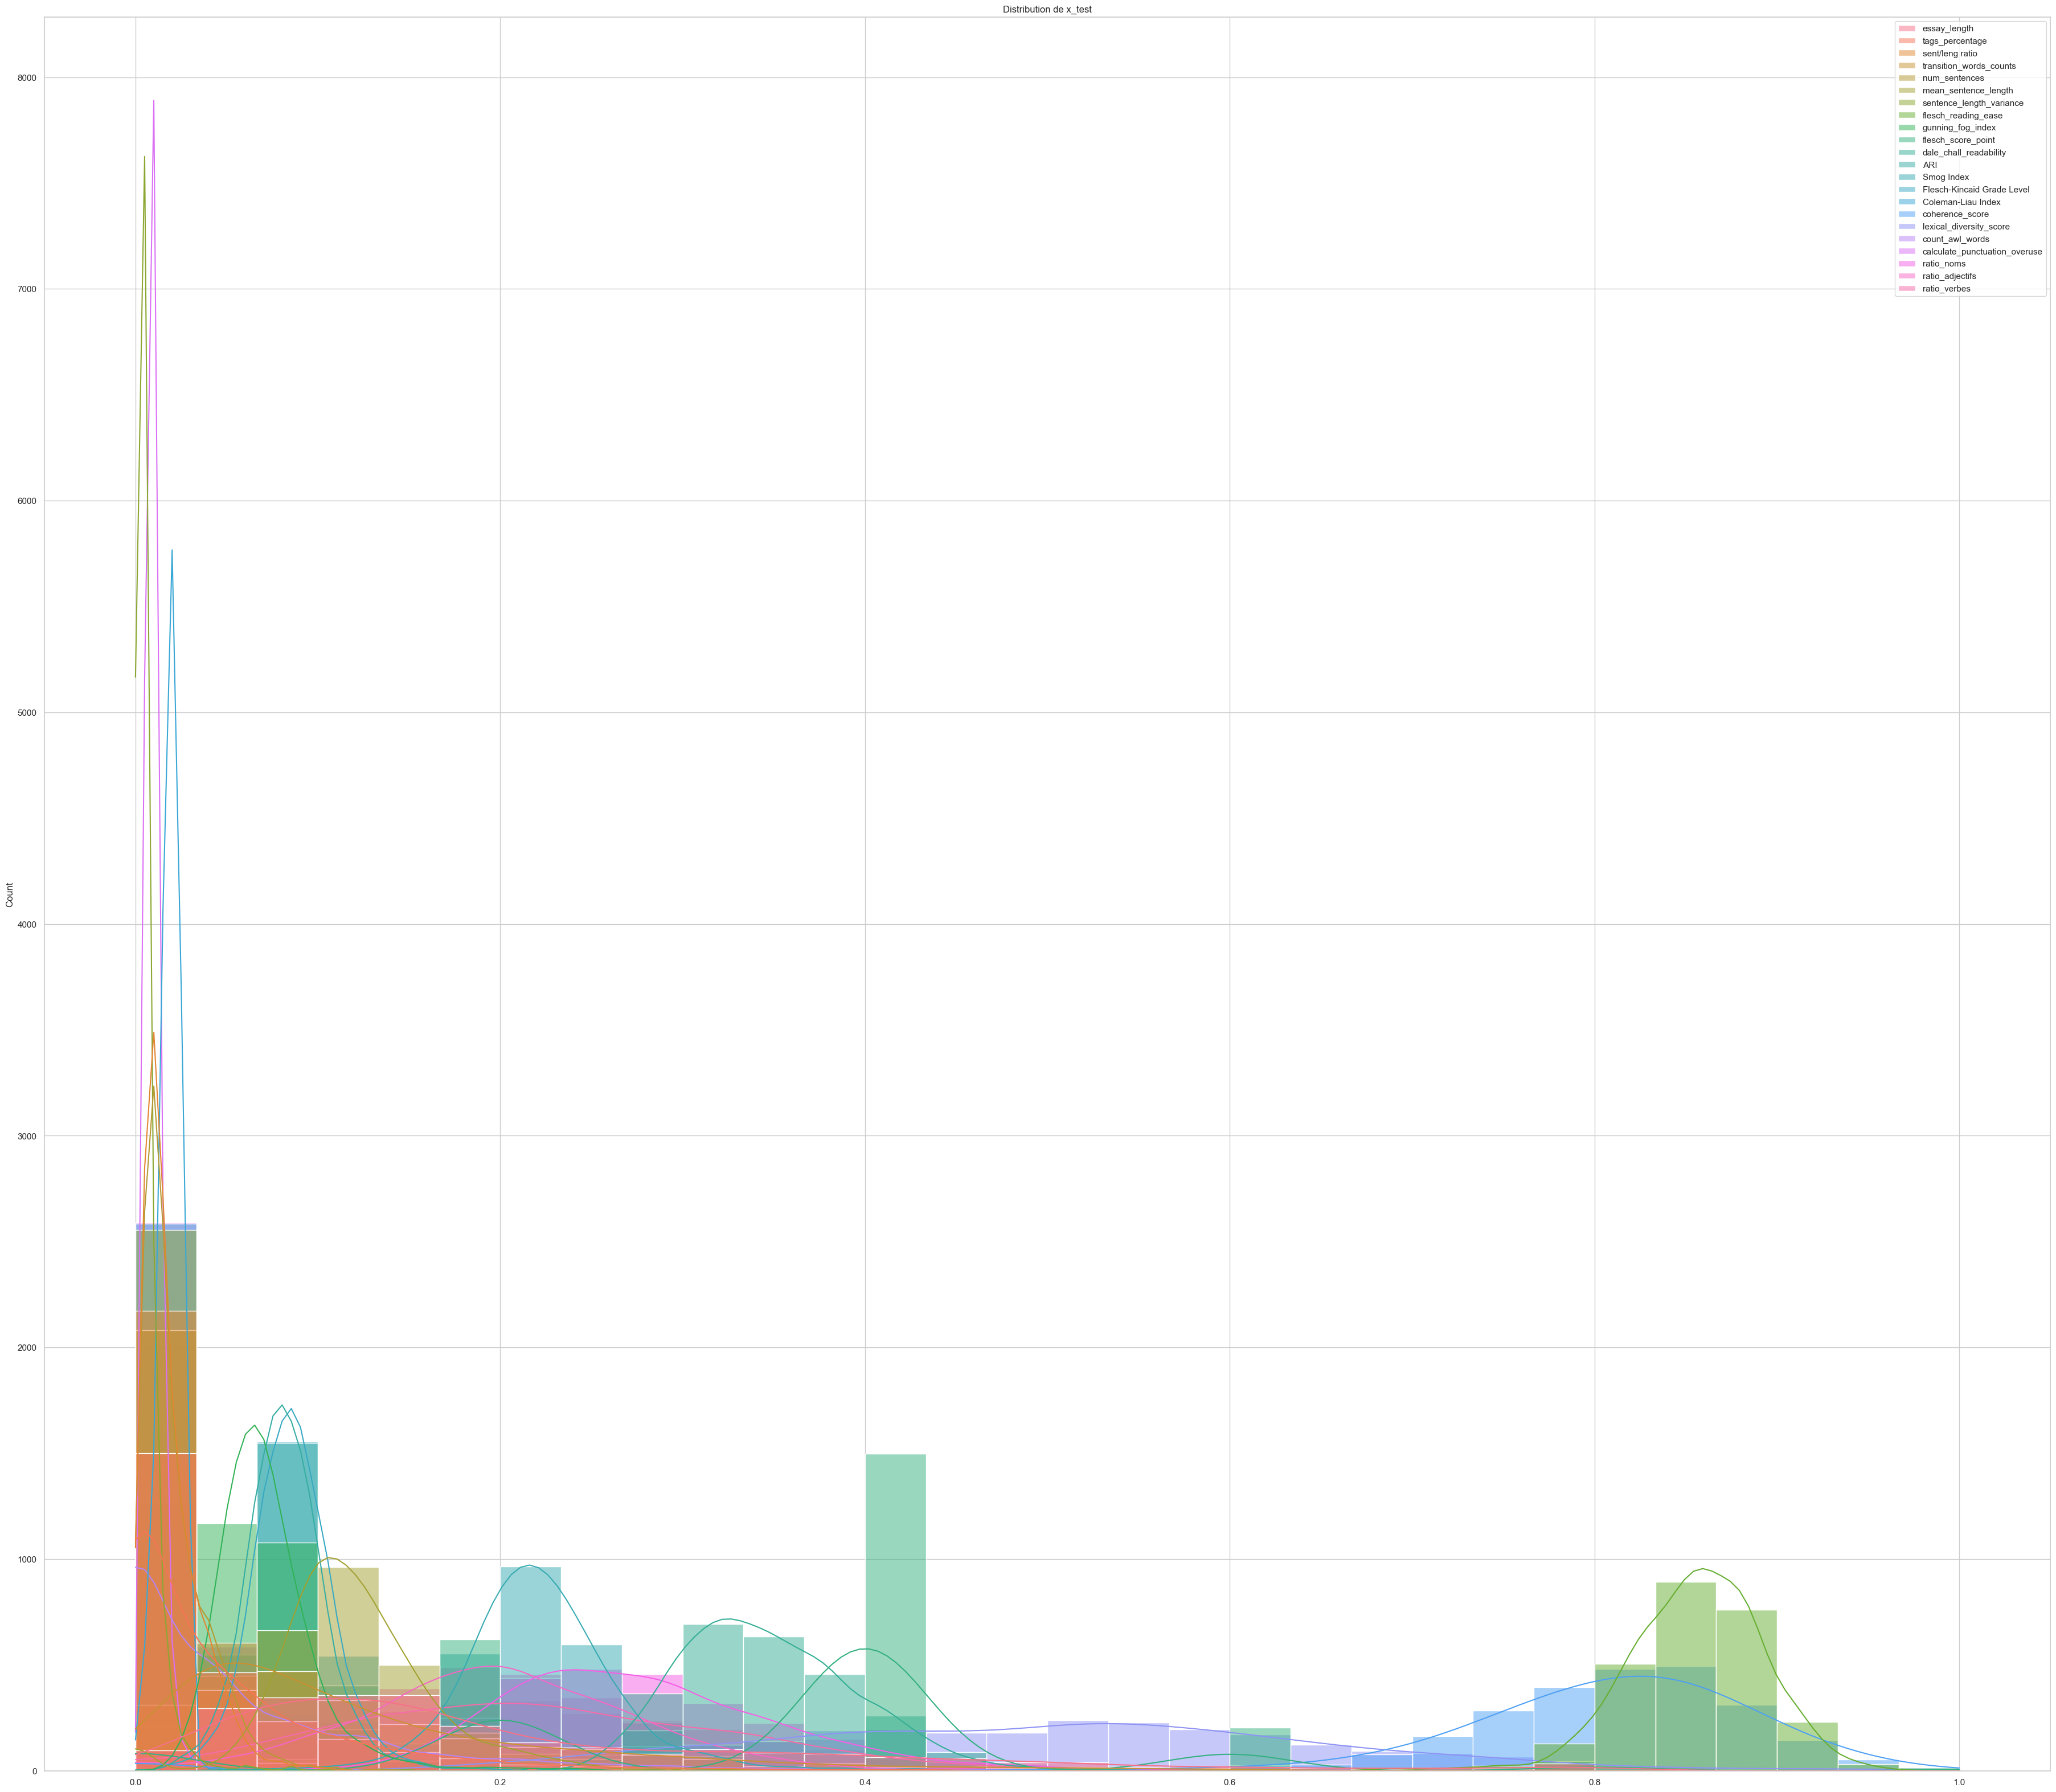

In [133]:

# Pour xtest
plt.figure(figsize=(100, 40))
plt.subplot(1, 2, 2)
sns.histplot(X_test, kde=True, bins=30)
plt.title('Distribution de x_test')

plt.show()

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Initialiser les modèles
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=20, random_state=10)

# SVR et MLP fonctionnent souvent mieux avec des données normalisées
model_svr = make_pipeline(StandardScaler(), MultiOutputRegressor(SVR()))
model_mlp = make_pipeline(StandardScaler(), MultiOutputRegressor(MLPRegressor(random_state=42)))

# Random Forest et Linear Regression n'ont pas besoin de la normalisation dans un pipeline
model_rf_multi = MultiOutputRegressor(model_rf)
model_lr_multi = MultiOutputRegressor(model_lr)  # Prévu si vous avez des sorties multiples

# Créer un dictionnaire pour les modèles pour faciliter l'itération
models = {
    'Linear Regression': model_lr_multi,
     'RandomForestRegressor' :model_rf,
    'Support Vector Regression': model_svr,
    'Multi-layer Perceptron': model_mlp
}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test)
    # Calculer et afficher l'erreur quadratique moyenne et le R^2
    mse = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
    r2 = r2_score(y_test, y_pred, multioutput='uniform_average')  # or 'variance_weighted' if you prefer
    print(f'{name} MSE: {mse:.3f}')
    print(f'{name} R^2: {r2:.3f}')


Linear Regression MSE: 16.819
Linear Regression R^2: 0.328
RandomForestRegressor MSE: 10.283
RandomForestRegressor R^2: 0.411
Support Vector Regression MSE: 13.486
Support Vector Regression R^2: 0.401


C:\Users\yaako\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-layer Perceptron MSE: 9.529
Multi-layer Perceptron R^2: 0.426


In [ ]:
(20 ,10 )

# Model training (motivation for selected model, comparison of different models) and evaluation (evaluation metric, results interpretation) [